In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.5f' % x)

from tensorflow.compat import v1
config = v1.ConfigProto()
config.gpu_options.allow_growth=True
sess = v1.Session(config=config)

In [2]:
random.seed(123)

In [3]:
df1 = pd.read_csv('Challenger_Ranked_Games.csv', index_col = 0)
df2 = pd.read_csv('GrandMaster_Ranked_Games.csv', index_col = 0)
df3 = pd.read_csv('Master_Ranked_Games.csv', index_col = 0)
pd.set_option("display.max_columns",None)

In [4]:
df1['chal']=1
df1['grand']=0
df1['master']=0
df2['chal']=0
df2['grand']=1
df2['master']=0
df3['chal']=0
df3['grand']=0
df3['master']=1

In [5]:
frames = [df1, df2, df3]

df = pd.concat(frames)

In [6]:
df.columns = ['gameDuration', 'blueWins', 'blueFirstBlood', 'blueFirstTower',
       'blueFirstBaron', 'blueFirstDragon', 'blueFirstInhibitor',
       'blueDragonKills', 'blueBaronKills', 'blueTowerKills',
       'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills',
       'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
       'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel',
       'blueJungleMinionKills', 'blueKillingSpree', 'blueTotalHeal',
       'blueObjectDamageDealt', 'redWins', 'redFirstBlood', 'redFirstTower',
       'redFirstBaron', 'redFirstDragon', 'redFirstInhibitor',
       'redDragonKills', 'redBaronKills', 'redTowerKills', 'redInhibitorKills',
       'redWardPlaced', 'redWardkills', 'redKills', 'redDeath', 'redAssist',
       'redChampionDamageDealt', 'redTotalGold', 'redTotalMinionKills',
       'redTotalLevel', 'redAvgLevel', 'redJungleMinionKills',
       'redKillingSpree', 'redTotalHeal', 'redObjectDamageDealt', 'chal',
       'grand', 'master']

## EDA and Dataset description

This dataset is available at Kaggle. It contains information about 199 925 games from the highest level of League of Legends. Variables describe how each team performed in the game. We have two possible variables to predict, first one which is not in our interest in this project is who won (2 variables, 1 for each team) and second one describing how long was the game. The longer the game the more champions, minions etc. you can kill, which makes it possible to predict length of the game with this data. 

Variables in our dataset before data engineering, some of them are described in pairs as they are just the same variable in perspective of other team:

#### Target variable
gameDuration - our target variable, length of the game in seconds  

blueWins, redWins - variable describing if given team has won the game, another target variable that can be predicted  

  
#### Independent variables
blueFirstBlood, redFirstBlood - variable describing whether given team has scored first kill in the game, it gives more gold than following kills  

blueFirstTower, redFirstTower - variable describing whether given team has destroyed first turret in the game, it gives additional gold  

blueFirstBaron, redFirstBaron - variable describing whether given team has killed first baron in the game, each baron kill temporary gives huge advantage  

blueFirstDragon, redFirstDragon - variable describing whether given team has killed first dragon in the game, each dragon killed permanently gives advantage  

blueFirstInhibitor, redFirstInhibitor - variable describing whether given team has destroyed enemy inhibitor as first, one of most important structures in game  

blueDragonKills, redDragonKills - variable describing how many times given team has killed a dragon  

blueBaronKills, redBaronKills - variable describing how many times given team has killed a Baron  

blueTowerKills, redTowerKills - variable describing how many turrets was destroyed by given team  

blueInhibitorKills, redInhibitorKills - variable describing how many inhibitors was destroyed by given team  

blueWardPlaced, redWardPlaced - variable describing how many wards was placed by given team, wards give vision on the map  

blueWardkills, redWardkills - variable describing how many wards was killed by given team, wards give vision on the map  

blueKills, redKills  - variable describing how many kills has scored given team in given game  

blueDeath, redDeath  - variable describing how many deaths has scored given team in given game  

blueAssist, redAssist  - variable describing how many assists has scored given team in given game  

blueChampionDamageDealt, redChampionDamageDealt  - variable describing amount of damage dealt by given team in given game  

blueTotalGold, redTotalGold - total amount of gold earned by given team in given game  

blueTotalMinionKills, redTotalMinionKills - total number of minions killed by given team in given game  

blueTotalLevel, redTotalLevel - sum of levels of champions in given team  

blueAvgLevel, redAvgLevel - average level of champions in given team  

blueJungleMinionKills, redJungleMinionKills - number of jungle monsters killed in given game by given team  

blueKillingSpree, redKillingSpree - number of killing sprees (series of kills) scored by given team  

blueTotalHeal, redTotalHeal - total amount of health healed by given team  

blueObjectDamageDealt, redObjectDamageDealt - total amount of damage dealt to objects by given team  

chal - game in challenger (highest rank)  

grand - game in grandmaster (2nd highest rank)  

master - game in master (3rd highest rank)  

In [7]:
df.head()

,gameDuration,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,chal,grand,master
gameId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4247263043,1323,0,1,0,0,0,0,0,0,0,0,38,13,15,31,22,56039,37001,440,56,11.20000,105,4,31035,5675,1,0,1,0,1,1,3,0,9,1,50,17,31,15,68,73016,49832,533,64,12.80000,138,8,38711,60463,1,0,0
4247155821,1317,1,0,0,0,1,0,2,0,4,0,57,18,19,8,31,60243,41072,531,63,12.60000,111,3,26397,45303,0,1,1,0,0,0,0,0,2,0,46,18,8,19,8,44218,37136,571,59,11.80000,134,3,24829,14105,1,0,0
4243963257,932,0,0,0,0,0,0,0,0,0,0,28,7,5,20,8,24014,22929,306,42,8.40000,64,0,6567,5651,1,1,1,0,1,1,2,0,5,1,40,9,20,5,20,30797,35364,400,50,10.00000,89,5,12589,45201,1,0,0
4241678498,2098,0,0,0,1,1,0,1,1,2,0,129,39,26,36,45,101607,63447,774,80,16.00000,226,3,24718,31019,1,1,1,0,0,0,3,1,6,0,96,56,36,26,72,125866,70528,832,84,16.80000,205,9,65312,88202,1,0,0
4241538868,2344,1,1,1,1,1,1,2,2,11,3,114,35,27,40,47,134826,74955,831,83,16.60000,252,5,37161,95287,0,0,0,0,0,0,3,1,6,1,100,43,40,27,83,131536,74596,794,85,17.00000,227,7,86431,64141,1,0,0


In [8]:
df.describe()

,gameDuration,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,chal,grand,master
count,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000
mean,1433.43401,0.49596,0.50653,0.51586,0.23668,0.40362,0.38279,1.35674,0.29774,4.34394,0.64706,53.43595,19.54683,24.72239,24.71319,40.39007,69502.00618,47927.72085,500.11551,64.71492,12.94298,123.91215,5.69107,24395.17239,37124.71253,0.50404,0.49128,0.47177,0.26015,0.48593,0.37041,1.51887,0.32965,4.27532,0.63305,53.56149,19.22249,24.62559,24.80656,40.24798,69241.99872,48022.22905,505.55446,64.91490,12.98298,125.72932,5.68272,24775.33869,36892.53909,0.13457,0.32960,0.53583
std,432.49024,0.49998,0.49996,0.49975,0.42505,0.49062,0.48607,1.25450,0.53504,3.37738,0.91012,30.36655,14.67244,13.54227,13.53933,29.14380,37443.35587,16069.28160,177.53644,14.81600,2.96320,66.00461,3.62842,15230.93613,26588.65476,0.49998,0.49993,0.49920,0.43872,0.49980,0.48292,1.30774,0.55892,3.39275,0.90163,30.59552,14.45494,13.52611,13.55776,29.04145,37440.92582,16271.61808,181.30221,14.95355,2.99071,66.88771,3.63333,15428.89125,26916.04887,0.34127,0.47007,0.49872
min,132.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3355.00000,0.00000,5.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,1125.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,33.00000,8.00000,15.00000,15.00000,20.00000,41608.00000,36540.00000,383.00000,55.00000,11.00000,83.00000,3.00000,13334.00000,13646.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,33.00000,8.00000,15.00000,15.00000,20.00000,41312.00000,36472.00000,386.00000,55.00000,11.00000,84.00000,3.00000,13596.00000,12739.00000,0.00000,0.00000,0.00000
50%,1420.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,4.00000,0.00000,53.00000,18.00000,24.00000,24.00000,35.00000,64485.00000,47898.00000,515.00000,66.00000,13.20000,126.00000,5.00000,21328.00000,33123.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,4.00000,0.00000,53.00000,18.00000,24.00000,24.00000,35.00000,64284.00000,48029.00000,522.00000,66.00000,13.20000,128.00000,5.00000,21733.00000,32483.00000,0.00000,0.00000,1.00000
75%,1732.00000,1.00000,1.00000,1.00000,0.00000,1.00000,1.00000,2.00000,1.00000,7.00000,1.00000,73.00000,29.00000,33.00000,33.00000,54.00000,90893.00000,58824.00000,623.00000,75.00000,15.00000,169.00000,8.00000,32076.00000,56808.00000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199925 entries, 4247263043 to 4195660684
Data columns (total 52 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   gameDuration             199925 non-null  int64  
 1   blueWins                 199925 non-null  int64  
 2   blueFirstBlood           199925 non-null  int64  
 3   blueFirstTower           199925 non-null  int64  
 4   blueFirstBaron           199925 non-null  int64  
 5   blueFirstDragon          199925 non-null  int64  
 6   blueFirstInhibitor       199925 non-null  int64  
 7   blueDragonKills          199925 non-null  int64  
 8   blueBaronKills           199925 non-null  int64  
 9   blueTowerKills           199925 non-null  int64  
 10  blueInhibitorKills       199925 non-null  int64  
 11  blueWardPlaced           199925 non-null  int64  
 12  blueWardkills            199925 non-null  int64  
 13  blueKills                199925 non-null  int6

Variable:  gameDuration 

count   199925.00000
mean      1433.43401
std        432.49024
min        132.00000
25%       1125.00000
50%       1420.00000
75%       1732.00000
max       3758.00000
Name: gameDuration, dtype: float64


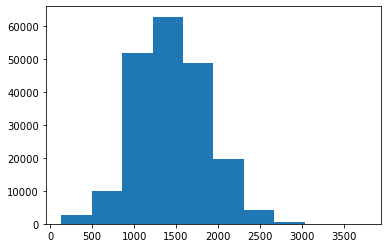





Variable:  blueWins 

count   199925.00000
mean         0.49596
std          0.49998
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max          1.00000
Name: blueWins, dtype: float64


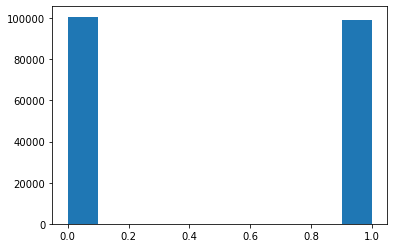





Variable:  blueFirstBlood 

count   199925.00000
mean         0.50653
std          0.49996
min          0.00000
25%          0.00000
50%          1.00000
75%          1.00000
max          1.00000
Name: blueFirstBlood, dtype: float64


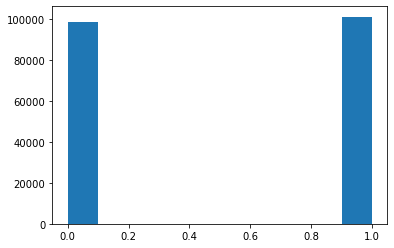





Variable:  blueFirstTower 

count   199925.00000
mean         0.51586
std          0.49975
min          0.00000
25%          0.00000
50%          1.00000
75%          1.00000
max          1.00000
Name: blueFirstTower, dtype: float64


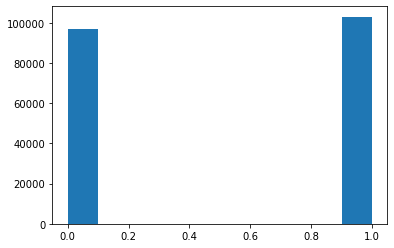





Variable:  blueFirstBaron 

count   199925.00000
mean         0.23668
std          0.42505
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          1.00000
Name: blueFirstBaron, dtype: float64


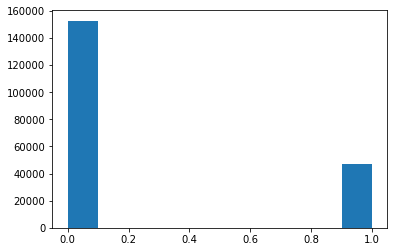





Variable:  blueFirstDragon 

count   199925.00000
mean         0.40362
std          0.49062
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max          1.00000
Name: blueFirstDragon, dtype: float64


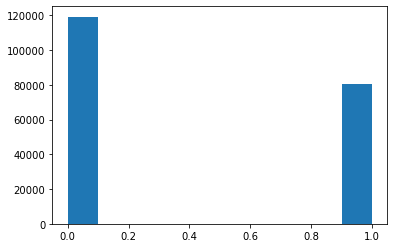





Variable:  blueFirstInhibitor 

count   199925.00000
mean         0.38279
std          0.48607
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max          1.00000
Name: blueFirstInhibitor, dtype: float64


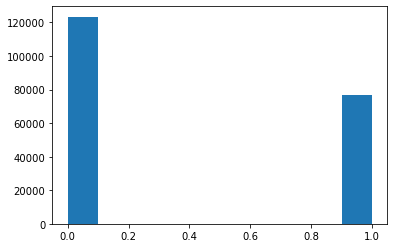





Variable:  blueDragonKills 

count   199925.00000
mean         1.35674
std          1.25450
min          0.00000
25%          0.00000
50%          1.00000
75%          2.00000
max          7.00000
Name: blueDragonKills, dtype: float64


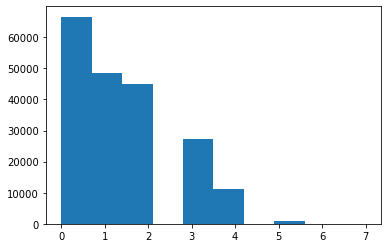





Variable:  blueBaronKills 

count   199925.00000
mean         0.29774
std          0.53504
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max          4.00000
Name: blueBaronKills, dtype: float64


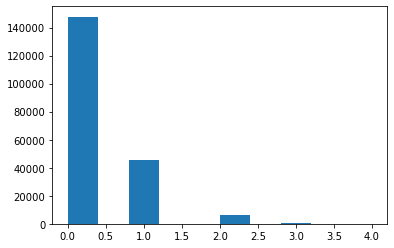





Variable:  blueTowerKills 

count   199925.00000
mean         4.34394
std          3.37738
min          0.00000
25%          1.00000
50%          4.00000
75%          7.00000
max         11.00000
Name: blueTowerKills, dtype: float64


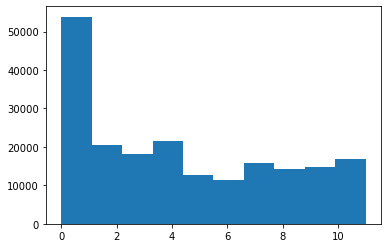





Variable:  blueInhibitorKills 

count   199925.00000
mean         0.64706
std          0.91012
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max          9.00000
Name: blueInhibitorKills, dtype: float64


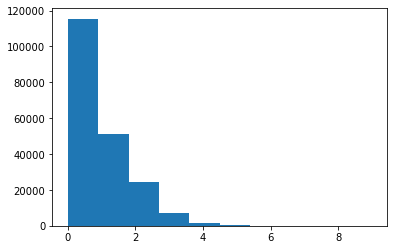





Variable:  blueWardPlaced 

count   199925.00000
mean        53.43595
std         30.36655
min          0.00000
25%         33.00000
50%         53.00000
75%         73.00000
max        230.00000
Name: blueWardPlaced, dtype: float64


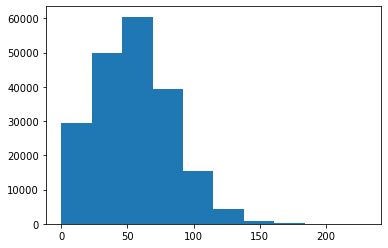





Variable:  blueWardkills 

count   199925.00000
mean        19.54683
std         14.67244
min          0.00000
25%          8.00000
50%         18.00000
75%         29.00000
max        118.00000
Name: blueWardkills, dtype: float64


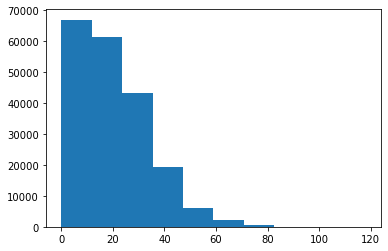





Variable:  blueKills 

count   199925.00000
mean        24.72239
std         13.54227
min          0.00000
25%         15.00000
50%         24.00000
75%         33.00000
max        112.00000
Name: blueKills, dtype: float64


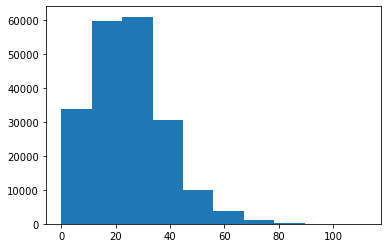





Variable:  blueDeath 

count   199925.00000
mean        24.71319
std         13.53933
min          0.00000
25%         15.00000
50%         24.00000
75%         33.00000
max        117.00000
Name: blueDeath, dtype: float64


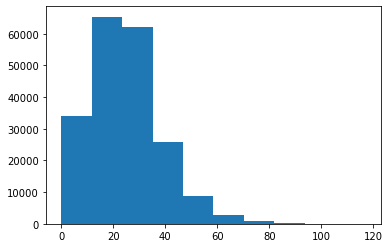





Variable:  blueAssist 

count   199925.00000
mean        40.39007
std         29.14380
min          0.00000
25%         20.00000
50%         35.00000
75%         54.00000
max        256.00000
Name: blueAssist, dtype: float64


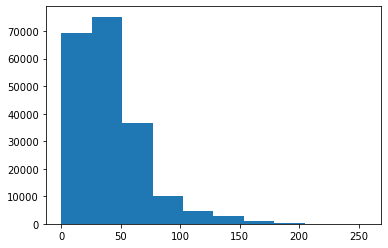





Variable:  blueChampionDamageDealt 

count   199925.00000
mean     69502.00618
std      37443.35587
min          0.00000
25%      41608.00000
50%      64485.00000
75%      90893.00000
max     381484.00000
Name: blueChampionDamageDealt, dtype: float64


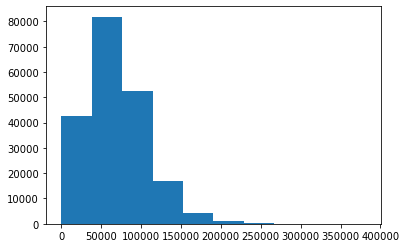





Variable:  blueTotalGold 

count   199925.00000
mean     47927.72085
std      16069.28160
min       3355.00000
25%      36540.00000
50%      47898.00000
75%      58824.00000
max     134323.00000
Name: blueTotalGold, dtype: float64


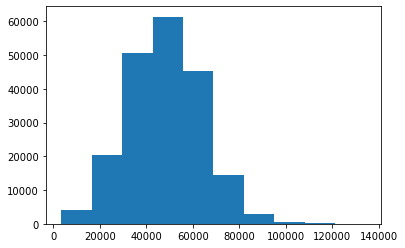





Variable:  blueTotalMinionKills 

count   199925.00000
mean       500.11551
std        177.53644
min          0.00000
25%        383.00000
50%        515.00000
75%        623.00000
max       1514.00000
Name: blueTotalMinionKills, dtype: float64


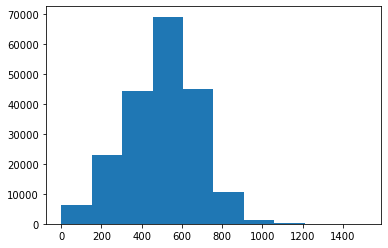





Variable:  blueTotalLevel 

count   199925.00000
mean        64.71492
std         14.81600
min          5.00000
25%         55.00000
50%         66.00000
75%         75.00000
max        141.00000
Name: blueTotalLevel, dtype: float64


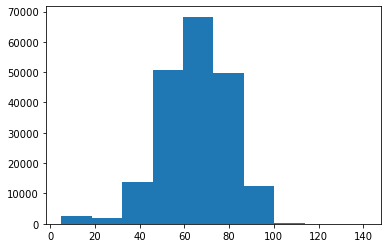





Variable:  blueAvgLevel 

count   199925.00000
mean        12.94298
std          2.96320
min          1.00000
25%         11.00000
50%         13.20000
75%         15.00000
max         28.20000
Name: blueAvgLevel, dtype: float64


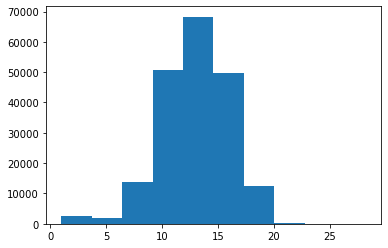





Variable:  blueJungleMinionKills 

count   199925.00000
mean       123.91215
std         66.00461
min          0.00000
25%         83.00000
50%        126.00000
75%        169.00000
max        402.00000
Name: blueJungleMinionKills, dtype: float64


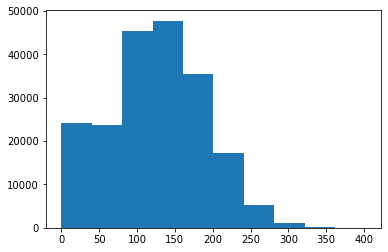





Variable:  blueKillingSpree 

count   199925.00000
mean         5.69107
std          3.62842
min          0.00000
25%          3.00000
50%          5.00000
75%          8.00000
max         31.00000
Name: blueKillingSpree, dtype: float64


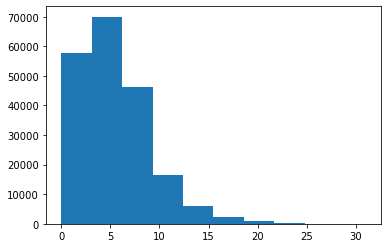





Variable:  blueTotalHeal 

count   199925.00000
mean     24395.17239
std      15230.93613
min          0.00000
25%      13334.00000
50%      21328.00000
75%      32076.00000
max     261707.00000
Name: blueTotalHeal, dtype: float64


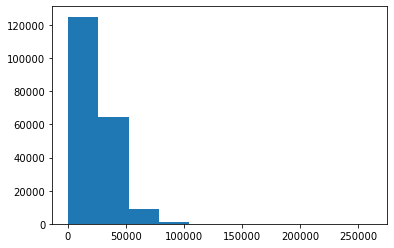





Variable:  blueObjectDamageDealt 

count   199925.00000
mean     37124.71253
std      26588.65476
min          0.00000
25%      13646.00000
50%      33123.00000
75%      56808.00000
max     167692.00000
Name: blueObjectDamageDealt, dtype: float64


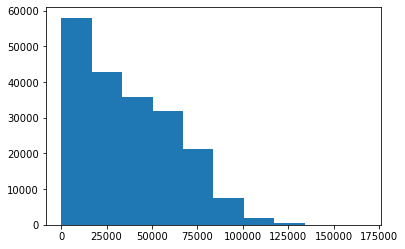





Variable:  redWins 

count   199925.00000
mean         0.50404
std          0.49998
min          0.00000
25%          0.00000
50%          1.00000
75%          1.00000
max          1.00000
Name: redWins, dtype: float64


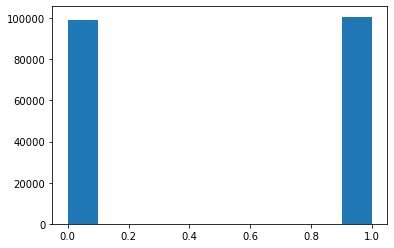





Variable:  redFirstBlood 

count   199925.00000
mean         0.49128
std          0.49993
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max          1.00000
Name: redFirstBlood, dtype: float64


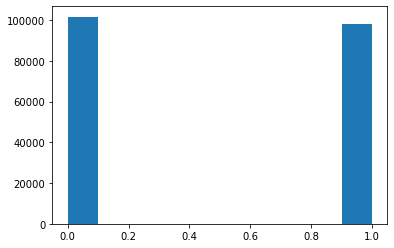





Variable:  redFirstTower 

count   199925.00000
mean         0.47177
std          0.49920
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max          1.00000
Name: redFirstTower, dtype: float64


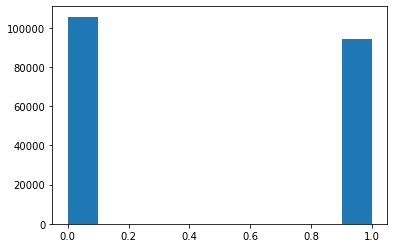





Variable:  redFirstBaron 

count   199925.00000
mean         0.26015
std          0.43872
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max          1.00000
Name: redFirstBaron, dtype: float64


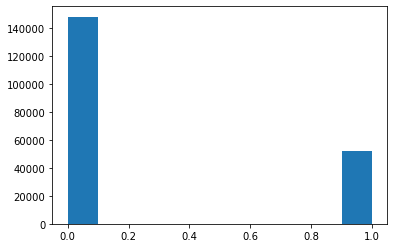





Variable:  redFirstDragon 

count   199925.00000
mean         0.48593
std          0.49980
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max          1.00000
Name: redFirstDragon, dtype: float64


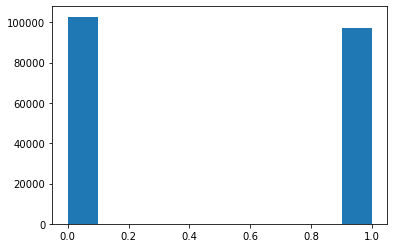





Variable:  redFirstInhibitor 

count   199925.00000
mean         0.37041
std          0.48292
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max          1.00000
Name: redFirstInhibitor, dtype: float64


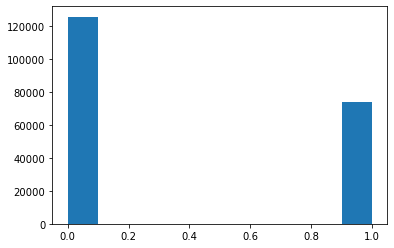





Variable:  redDragonKills 

count   199925.00000
mean         1.51887
std          1.30774
min          0.00000
25%          0.00000
50%          1.00000
75%          2.00000
max          7.00000
Name: redDragonKills, dtype: float64


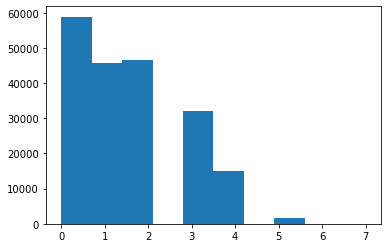





Variable:  redBaronKills 

count   199925.00000
mean         0.32965
std          0.55892
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max          5.00000
Name: redBaronKills, dtype: float64


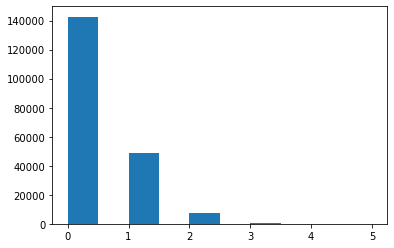





Variable:  redTowerKills 

count   199925.00000
mean         4.27532
std          3.39275
min          0.00000
25%          1.00000
50%          4.00000
75%          7.00000
max         11.00000
Name: redTowerKills, dtype: float64


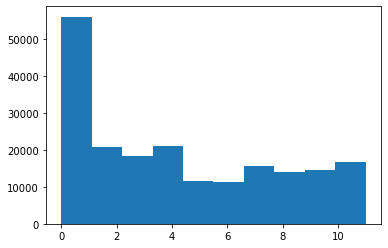





Variable:  redInhibitorKills 

count   199925.00000
mean         0.63305
std          0.90163
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max         10.00000
Name: redInhibitorKills, dtype: float64


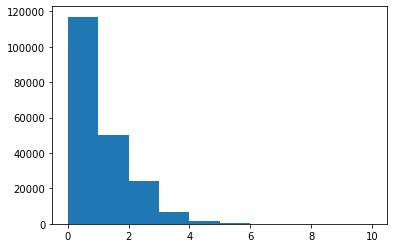





Variable:  redWardPlaced 

count   199925.00000
mean        53.56149
std         30.59552
min          0.00000
25%         33.00000
50%         53.00000
75%         73.00000
max        248.00000
Name: redWardPlaced, dtype: float64


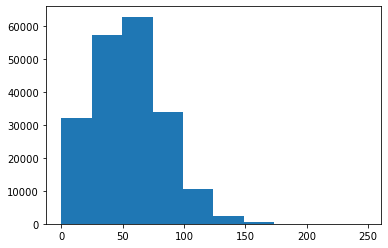





Variable:  redWardkills 

count   199925.00000
mean        19.22249
std         14.45494
min          0.00000
25%          8.00000
50%         18.00000
75%         28.00000
max        117.00000
Name: redWardkills, dtype: float64


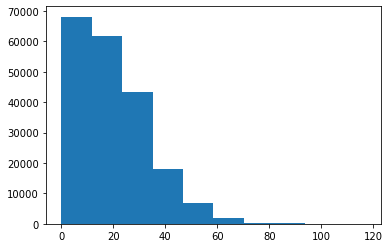





Variable:  redKills 

count   199925.00000
mean        24.62559
std         13.52611
min          0.00000
25%         15.00000
50%         24.00000
75%         33.00000
max        116.00000
Name: redKills, dtype: float64


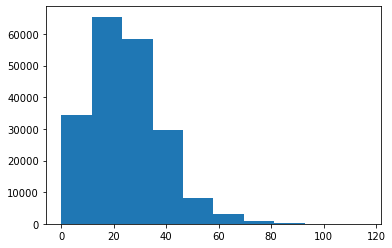





Variable:  redDeath 

count   199925.00000
mean        24.80656
std         13.55776
min          0.00000
25%         15.00000
50%         24.00000
75%         33.00000
max        112.00000
Name: redDeath, dtype: float64


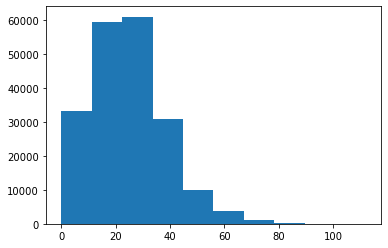





Variable:  redAssist 

count   199925.00000
mean        40.24798
std         29.04145
min          0.00000
25%         20.00000
50%         35.00000
75%         54.00000
max        229.00000
Name: redAssist, dtype: float64


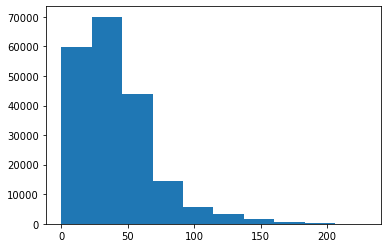





Variable:  redChampionDamageDealt 

count   199925.00000
mean     69241.99872
std      37440.92582
min          0.00000
25%      41312.00000
50%      64284.00000
75%      90679.00000
max     359184.00000
Name: redChampionDamageDealt, dtype: float64


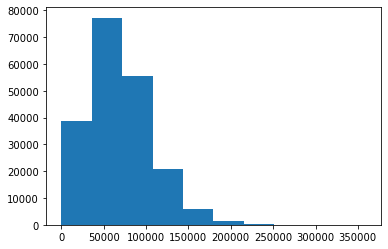





Variable:  redTotalGold 

count   199925.00000
mean     48022.22905
std      16271.61808
min          0.00000
25%      36472.00000
50%      48029.00000
75%      59101.00000
max     141692.00000
Name: redTotalGold, dtype: float64


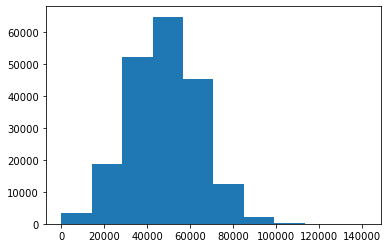





Variable:  redTotalMinionKills 

count   199925.00000
mean       505.55446
std        181.30221
min          0.00000
25%        386.00000
50%        522.00000
75%        631.00000
max       1443.00000
Name: redTotalMinionKills, dtype: float64


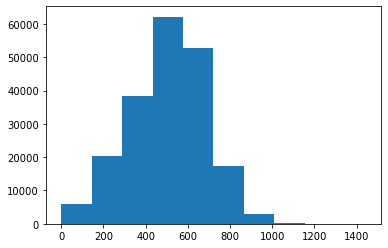





Variable:  redTotalLevel 

count   199925.00000
mean        64.91490
std         14.95355
min          0.00000
25%         55.00000
50%         66.00000
75%         75.00000
max        145.00000
Name: redTotalLevel, dtype: float64


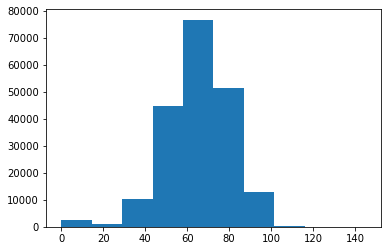





Variable:  redAvgLevel 

count   199925.00000
mean        12.98298
std          2.99071
min          0.00000
25%         11.00000
50%         13.20000
75%         15.00000
max         29.00000
Name: redAvgLevel, dtype: float64


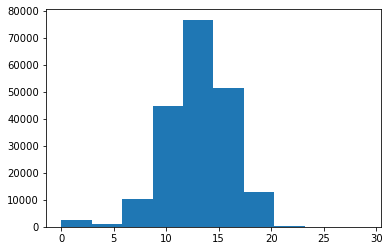





Variable:  redJungleMinionKills 

count   199925.00000
mean       125.72932
std         66.88771
min          0.00000
25%         84.00000
50%        128.00000
75%        172.00000
max        488.00000
Name: redJungleMinionKills, dtype: float64


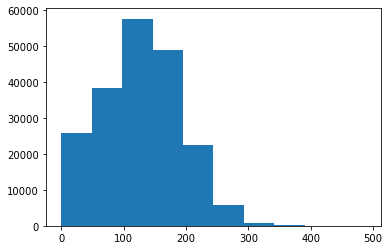





Variable:  redKillingSpree 

count   199925.00000
mean         5.68272
std          3.63333
min          0.00000
25%          3.00000
50%          5.00000
75%          8.00000
max         29.00000
Name: redKillingSpree, dtype: float64


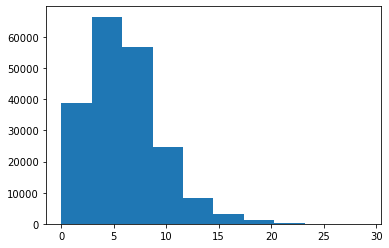





Variable:  redTotalHeal 

count   199925.00000
mean     24775.33869
std      15428.89125
min          0.00000
25%      13596.00000
50%      21733.00000
75%      32589.00000
max     206758.00000
Name: redTotalHeal, dtype: float64


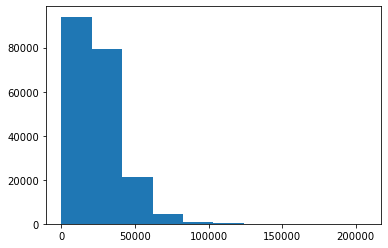





Variable:  redObjectDamageDealt 

count   199925.00000
mean     36892.53909
std      26916.04887
min          0.00000
25%      12739.00000
50%      32483.00000
75%      57311.00000
max     197135.00000
Name: redObjectDamageDealt, dtype: float64


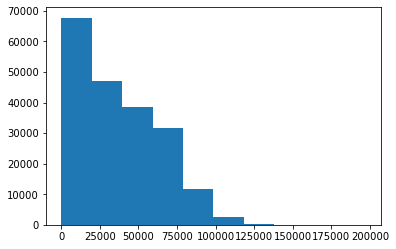





Variable:  chal 

count   199925.00000
mean         0.13457
std          0.34127
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          1.00000
Name: chal, dtype: float64


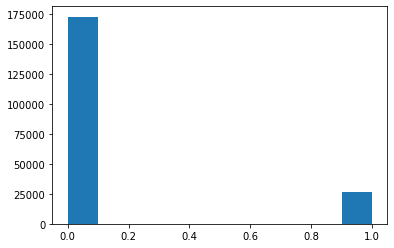





Variable:  grand 

count   199925.00000
mean         0.32960
std          0.47007
min          0.00000
25%          0.00000
50%          0.00000
75%          1.00000
max          1.00000
Name: grand, dtype: float64


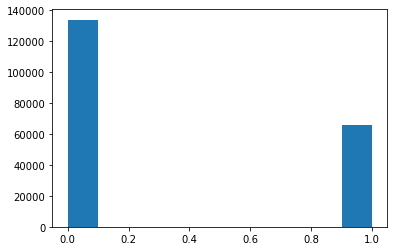





Variable:  master 

count   199925.00000
mean         0.53583
std          0.49872
min          0.00000
25%          0.00000
50%          1.00000
75%          1.00000
max          1.00000
Name: master, dtype: float64


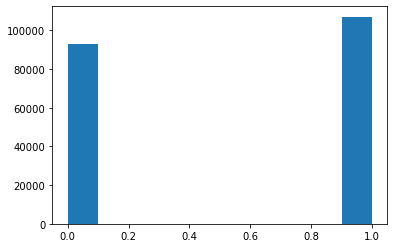

In [10]:
for col in df.columns:
    print("Variable: ",col, "\n")
    print(df[col].describe())
    plt.hist(df[col])
    plt.show()
    print('\n\n\n')

In [11]:
continuous = ['blueDragonKills', 'blueBaronKills', 'blueTowerKills',
           'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills',
           'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
           'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel',
           'blueJungleMinionKills', 'blueKillingSpree', 'blueTotalHeal',
           'blueObjectDamageDealt', 'redDragonKills', 'redBaronKills', 'redTowerKills', 'redInhibitorKills',
           'redWardPlaced', 'redWardkills', 'redKills', 'redDeath', 'redAssist',
           'redChampionDamageDealt', 'redTotalGold', 'redTotalMinionKills',
           'redTotalLevel', 'redAvgLevel', 'redJungleMinionKills','redKillingSpree',
            'redTotalHeal', 'redObjectDamageDealt']

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


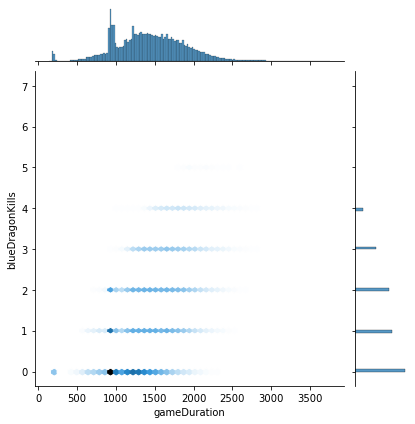

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


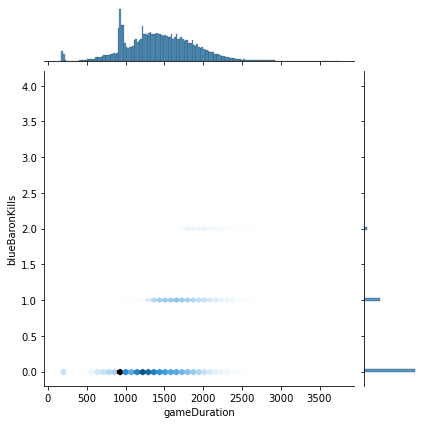

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


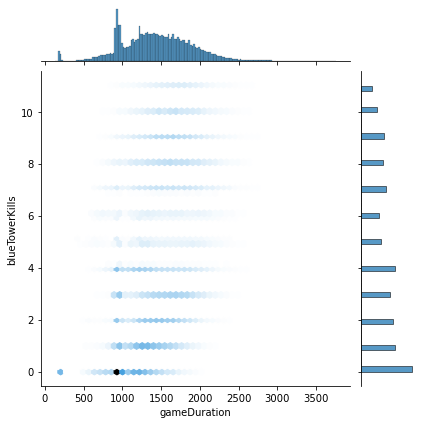

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


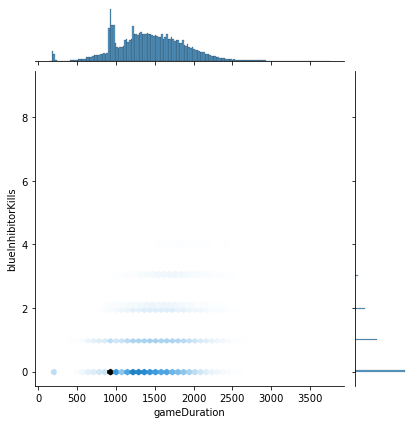

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


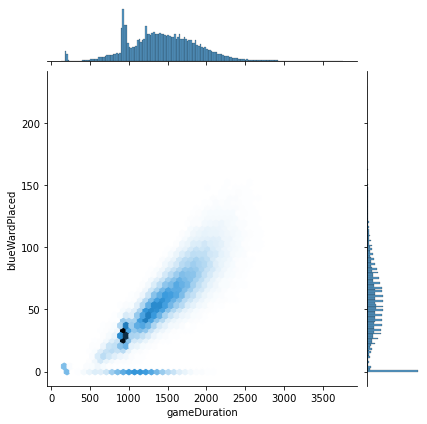

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


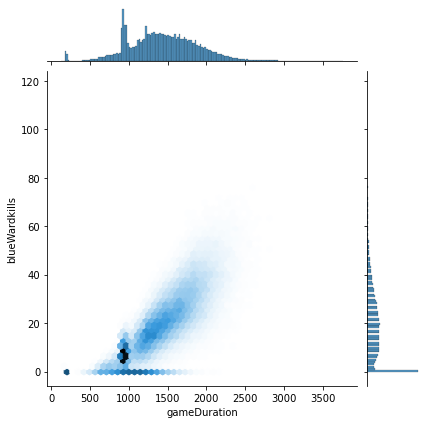

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


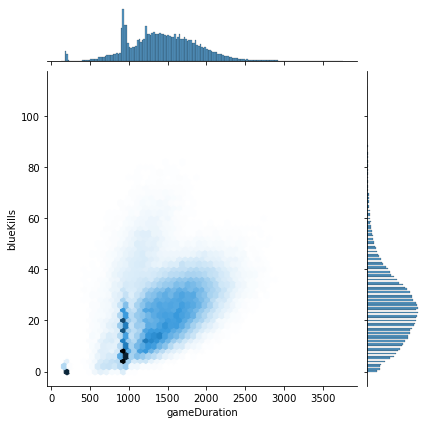

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


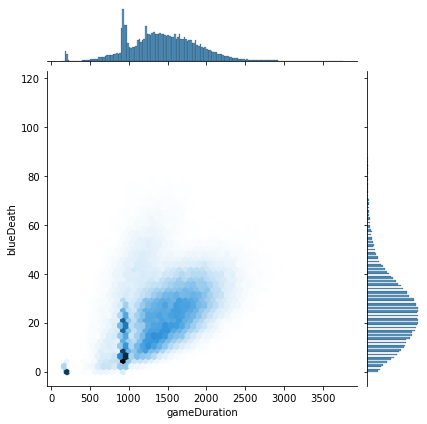

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


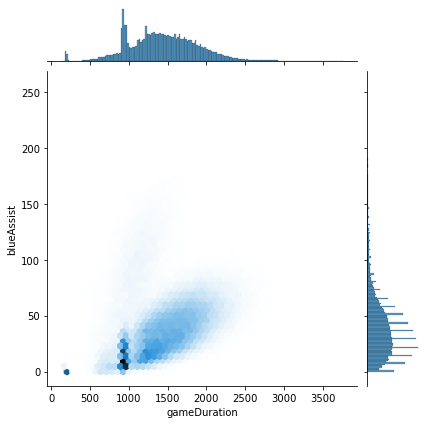

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


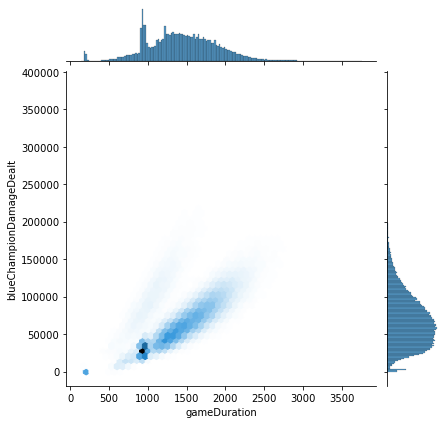

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


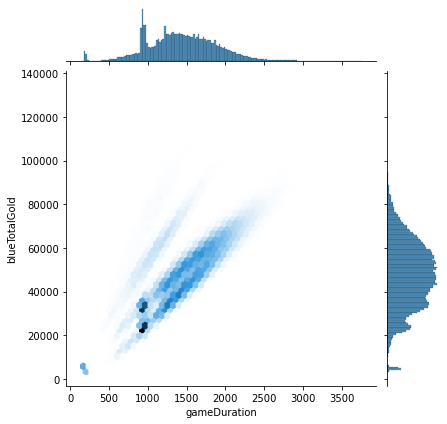

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


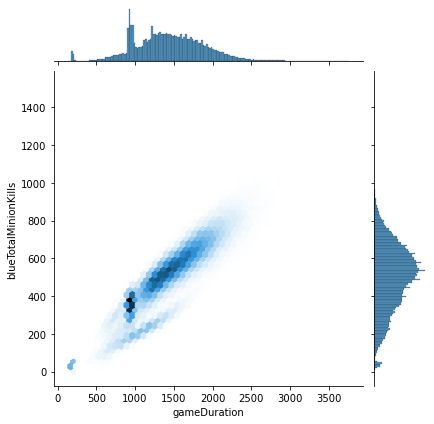

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


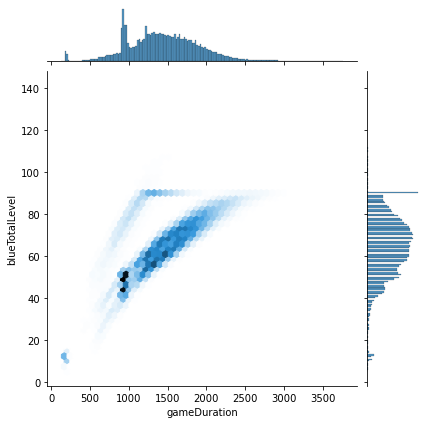

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


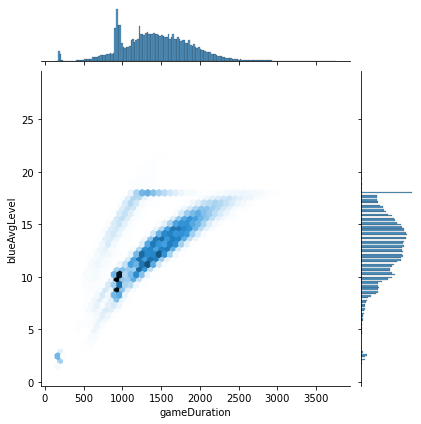

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


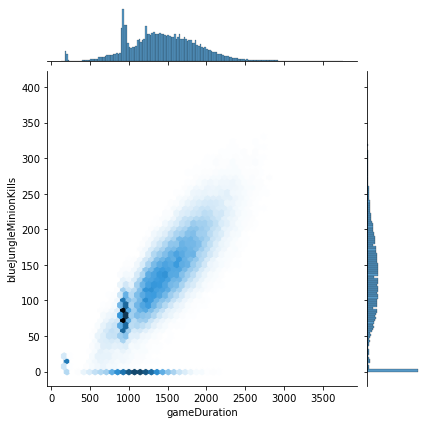

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


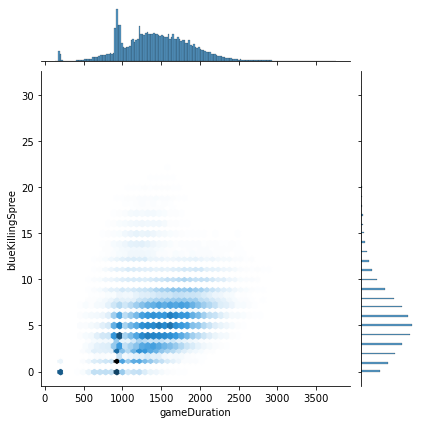

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


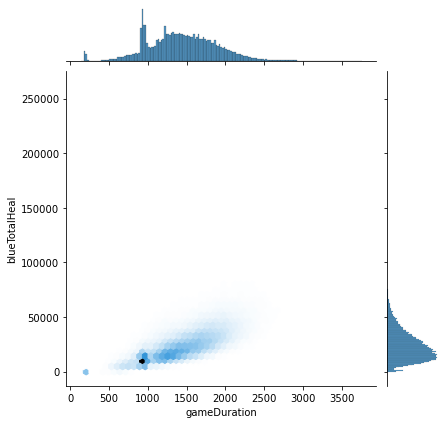

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


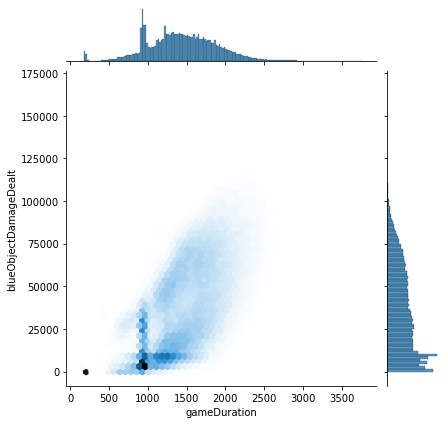

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


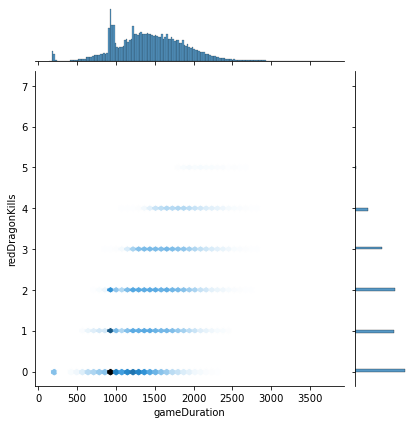

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


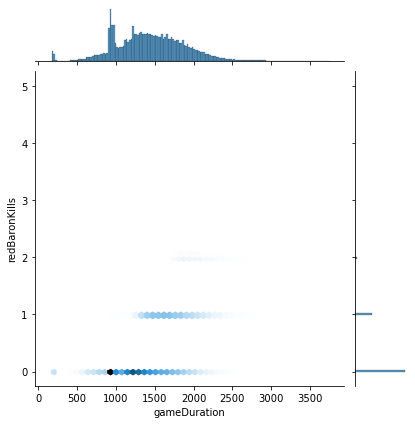

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


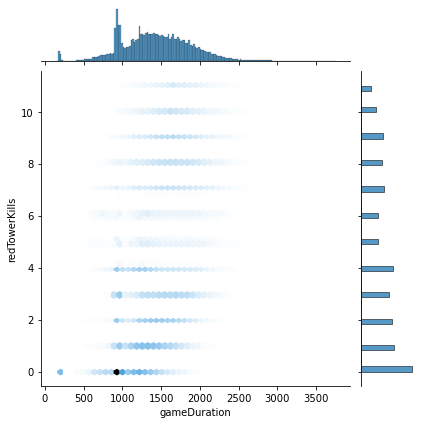

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


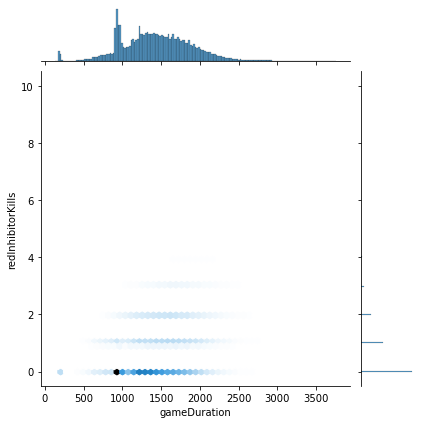

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


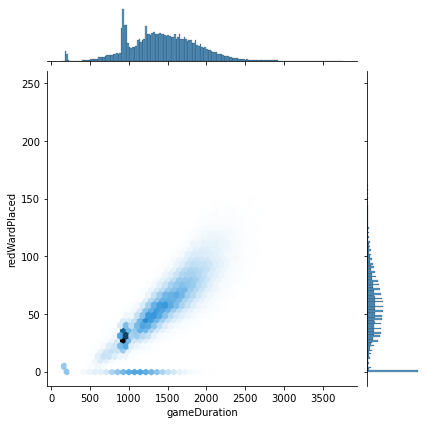

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


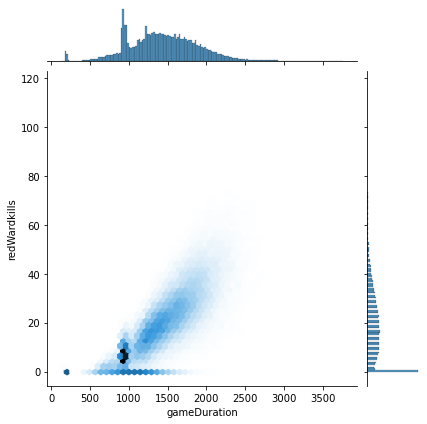

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


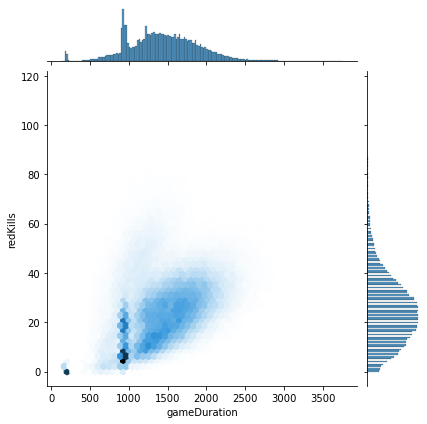

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


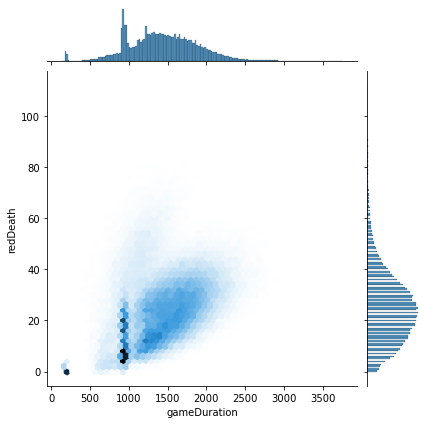

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


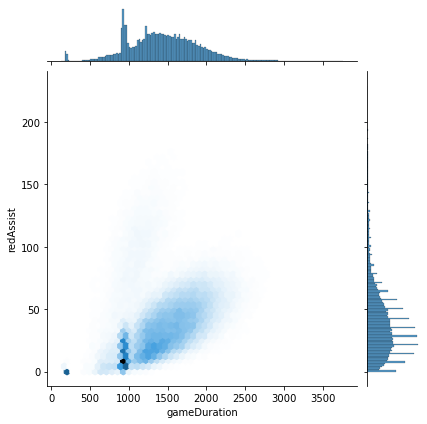

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


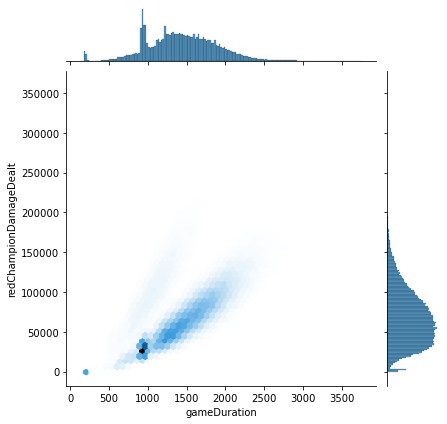

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


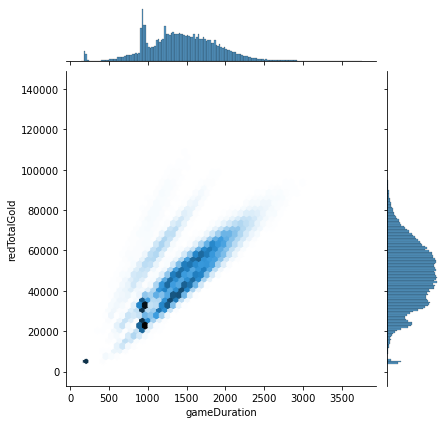

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


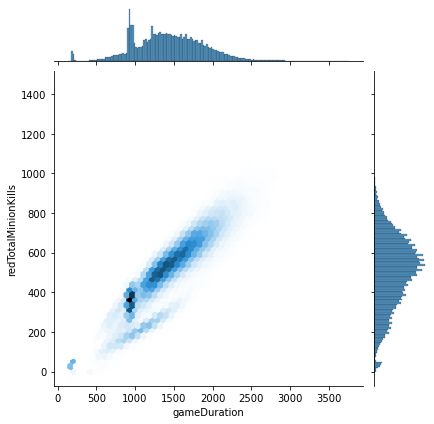

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


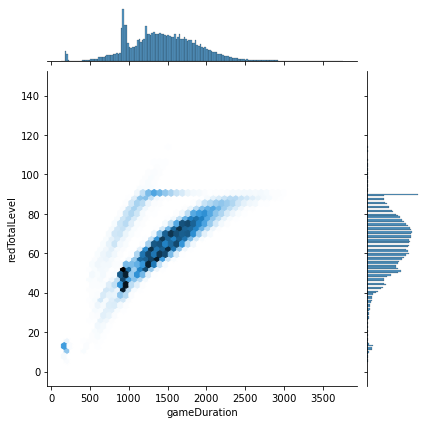

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


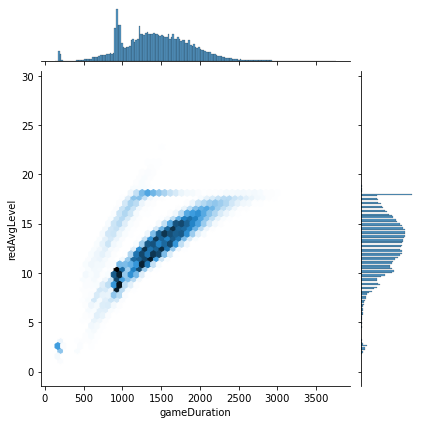

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


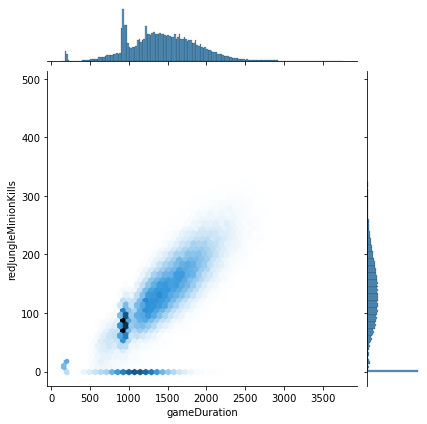

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


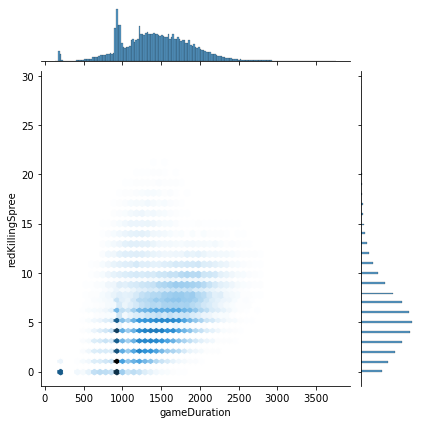

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


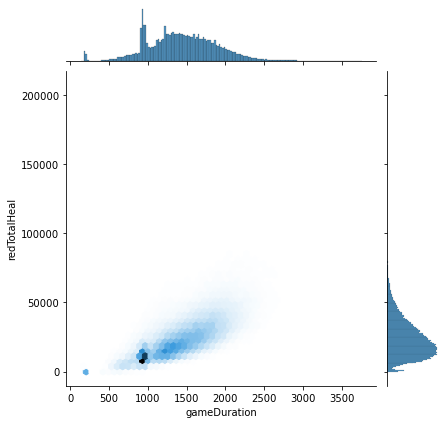

/home/jakub/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


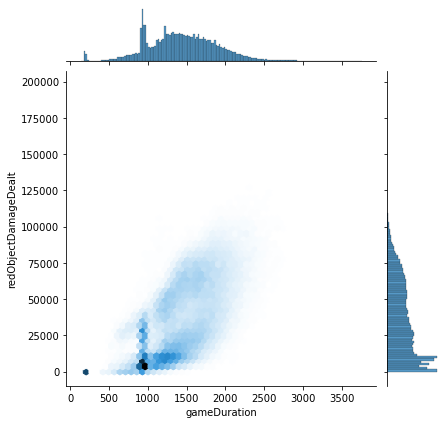

In [12]:
for col in continuous:
    sns.jointplot('gameDuration', col, data=df, kind='hex')
    plt.show()

As we can see there is a peak in game duration around 900 seconds which is 15 minutes. It is because it is possible to early surrender after 15 minutes and quite often one team has huge advantage and the result is already known before game ends. In such situations loosing team usually decides to surrender, but even if it would be reasonable to surrender earlier than at 15 minute it is impossible so all these situations are stacked around 15 minute. We will try to capture this so called "stomp" games by creating variables during feature engineering.

Independent variables:

In [13]:
cols=['blueFirstBlood', 'blueFirstTower',
       'blueFirstBaron', 'blueFirstDragon', 'blueFirstInhibitor',
       'blueDragonKills', 'blueBaronKills', 'blueTowerKills',
       'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills',
       'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
       'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel',
       'blueJungleMinionKills', 'blueKillingSpree', 'blueTotalHeal',
       'blueObjectDamageDealt', 'redFirstBlood', 'redFirstTower',
       'redFirstBaron', 'redFirstDragon', 'redFirstInhibitor',
       'redDragonKills', 'redBaronKills', 'redTowerKills', 'redInhibitorKills',
       'redWardPlaced', 'redWardkills', 'redKills', 'redDeath', 'redAssist',
       'redChampionDamageDealt', 'redTotalGold', 'redTotalMinionKills',
       'redTotalLevel', 'redAvgLevel', 'redJungleMinionKills',
       'redKillingSpree', 'redTotalHeal', 'redObjectDamageDealt', 'chal', 'grand', 'master']

### Missing values

There is no missing values in our dataset

In [14]:
df.isna().sum()

gameDuration               0
blueWins                   0
blueFirstBlood             0
blueFirstTower             0
blueFirstBaron             0
blueFirstDragon            0
blueFirstInhibitor         0
blueDragonKills            0
blueBaronKills             0
blueTowerKills             0
blueInhibitorKills         0
blueWardPlaced             0
blueWardkills              0
blueKills                  0
blueDeath                  0
blueAssist                 0
blueChampionDamageDealt    0
blueTotalGold              0
blueTotalMinionKills       0
blueTotalLevel             0
blueAvgLevel               0
blueJungleMinionKills      0
blueKillingSpree           0
blueTotalHeal              0
blueObjectDamageDealt      0
redWins                    0
redFirstBlood              0
redFirstTower              0
redFirstBaron              0
redFirstDragon             0
redFirstInhibitor          0
redDragonKills             0
redBaronKills              0
redTowerKills              0
redInhibitorKi

## Feature engineering

As I mentioned earlier in league of legends there are games in which one team has very big advantage, those games are called "stomps". Such games usually are shorter and very often end at 15 minute by surrender. We can try to create variables that will allow us to capture this effect. Good indicator of 'stomp' should be the difference in total gold and number of kills between teams in relation to total gold and kills in game.

In [15]:
df['goldStomp']=abs(df['redTotalGold']-df['blueTotalGold'])/(df['redTotalGold']+df['blueTotalGold'])
df['killStomp']=abs(df['redKills']-df['blueKills'])/(df['redKills']+df['blueKills'])
#there could be NaNs created if number of kills in given game was 0, we will impute it with 0
df=df.fillna(0)

On the other hand there are objectives that if they are destroyed/killed it is usually very bad news for the other team. However if both teams were able to destroy at least one of such key objectives it usually means that:
1. Game is even
2. Loosing team was able to come back to the game  
We will create binary variables with value 1 if both teams were able to kill/destroy at least one of such key objectives.

In [16]:
df['BaronEven']=0
df.loc[(df['redBaronKills']>0) & (df['blueBaronKills']>0),'BaronEven']=1
df['InhibitorEven']=0
df.loc[(df['redInhibitorKills']>0) & (df['blueInhibitorKills']>0),'InhibitorEven']=1

What is more it is possible to quickly destroy three inhibitors one after another, but then inhibitors respawn after 5 minutes. If number of inhibitors destroyed by one team is bigger than 3 then it should be good indicator of long game because they had to wait at least 5 minutes to destroy 4th inhibitor. 

In [17]:
df['InhibitorRespawn']=0
df.loc[(df['redInhibitorKills']>3) | (df['blueInhibitorKills']>3),'InhibitorRespawn']=1

Objectives Baron and Dragon can respawn after some time as well. Then it is reasonable to add variables that are sum of such objectives destroyed in given game.

In [18]:
df['barons']=df['redBaronKills']+df['blueBaronKills']
df['dragons']=df['redDragonKills']+df['blueDragonKills']

What is more the difference between kills and assists should be higher when the game lasts longer. Usually in lategame people die in teamfights in which for each kill there is many assists, in the early game people ususally die 1vs1 or 1vs2.

In [19]:
df['redTeamfights'] = df['redAssist']-df['redKills']
df['blueTeamfights'] = df['blueAssist']-df['blueKills']

In [20]:
cols=['blueFirstBlood', 'blueFirstTower',
       'blueFirstBaron', 'blueFirstDragon', 'blueFirstInhibitor',
       'blueDragonKills', 'blueBaronKills', 'blueTowerKills',
       'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills',
       'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
       'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel',
       'blueJungleMinionKills', 'blueKillingSpree', 'blueTotalHeal',
       'blueObjectDamageDealt', 'redFirstBlood', 'redFirstTower',
       'redFirstBaron', 'redFirstDragon', 'redFirstInhibitor',
       'redDragonKills', 'redBaronKills', 'redTowerKills', 'redInhibitorKills',
       'redWardPlaced', 'redWardkills', 'redKills', 'redDeath', 'redAssist',
       'redChampionDamageDealt', 'redTotalGold', 'redTotalMinionKills',
       'redTotalLevel', 'redAvgLevel', 'redJungleMinionKills',
       'redKillingSpree', 'redTotalHeal', 'redObjectDamageDealt', 'chal', 'grand', 'master', 'killStomp', 'goldStomp', 'BaronEven',
       'InhibitorEven', 'InhibitorRespawn', 'barons', 'dragons', 'redTeamfights','blueTeamfights']

Let's change dtype of variables so we will be able to differ categorical ones from numerical ones and standarize the continuous ones..

In [21]:
categorical = ['blueFirstBlood', 'blueFirstTower',
               'blueFirstBaron', 'blueFirstDragon', 'blueFirstInhibitor',
               'redFirstBlood', 'redFirstTower',
               'redFirstBaron', 'redFirstDragon', 'redFirstInhibitor',
               'chal', 'grand', 'master', 'BaronEven',
               'InhibitorEven', 'InhibitorRespawn']
numerical = ['blueDragonKills', 'blueBaronKills', 'blueTowerKills',
           'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills',
           'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
           'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel',
           'blueJungleMinionKills', 'blueKillingSpree', 'blueTotalHeal',
           'blueObjectDamageDealt', 'redDragonKills', 'redBaronKills', 'redTowerKills', 'redInhibitorKills',
           'redWardPlaced', 'redWardkills', 'redKills', 'redDeath', 'redAssist',
           'redChampionDamageDealt', 'redTotalGold', 'redTotalMinionKills',
           'redTotalLevel', 'redAvgLevel', 'redJungleMinionKills','redKillingSpree',
            'redTotalHeal', 'redObjectDamageDealt', 'killStomp', 'goldStomp', 'barons', 'dragons','redTeamfights','blueTeamfights']

for col in categorical:
    df[col] = df[col].astype('int64')
for col in numerical:
    df[col] = df[col].astype('float64')
    df[col] = ((df[col]-df[col].min())/(df[col].max() - df[col].min())).astype('float64')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199925 entries, 4247263043 to 4195660684
Data columns (total 61 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   gameDuration             199925 non-null  int64  
 1   blueWins                 199925 non-null  int64  
 2   blueFirstBlood           199925 non-null  int64  
 3   blueFirstTower           199925 non-null  int64  
 4   blueFirstBaron           199925 non-null  int64  
 5   blueFirstDragon          199925 non-null  int64  
 6   blueFirstInhibitor       199925 non-null  int64  
 7   blueDragonKills          199925 non-null  float64
 8   blueBaronKills           199925 non-null  float64
 9   blueTowerKills           199925 non-null  float64
 10  blueInhibitorKills       199925 non-null  float64
 11  blueWardPlaced           199925 non-null  float64
 12  blueWardkills            199925 non-null  float64
 13  blueKills                199925 non-null  floa

## Feature selection



In the beginning we will remove variables that have the lowest explanatory power using mean absolute error metric in relation to mean value of our target variable.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold, train_test_split

In [24]:
mae=pd.DataFrame()
mae['col']=cols
pd.set_option('display.max_rows', None)
l=[]
for col in cols:
    var = np.array(df[col]).reshape(-1, 1)
    lm = LinearRegression()
    lm.fit(var, df['gameDuration'])
    preds = lm.predict(var)
    l.append(mean_absolute_error(df['gameDuration'], preds)/df['gameDuration'].mean())
mae['mae']=l
mae.sort_values(by=['mae'], ascending = False)

,col,mae
24,redFirstTower,0.24272
48,master,0.24267
0,blueFirstBlood,0.24267
23,redFirstBlood,0.24267
47,grand,0.24266
46,chal,0.24265
1,blueFirstTower,0.24257
3,blueFirstDragon,0.24193
26,redFirstDragon,0.24033
53,InhibitorRespawn,0.23897


In [25]:
cols = list(mae.loc[mae['mae']<=0.2, 'col'])

In [26]:
cols

['blueWardPlaced',
 'blueWardkills',
 'blueChampionDamageDealt',
 'blueTotalGold',
 'blueTotalMinionKills',
 'blueTotalLevel',
 'blueAvgLevel',
 'blueJungleMinionKills',
 'blueTotalHeal',
 'blueObjectDamageDealt',
 'redWardPlaced',
 'redWardkills',
 'redChampionDamageDealt',
 'redTotalGold',
 'redTotalMinionKills',
 'redTotalLevel',
 'redAvgLevel',
 'redJungleMinionKills',
 'redTotalHeal',
 'redObjectDamageDealt',
 'killStomp',
 'goldStomp',
 'barons',
 'dragons']

In our problem there will be a lot of variables that are strongly correlated. Lets look at correlation matrix.

<AxesSubplot:>

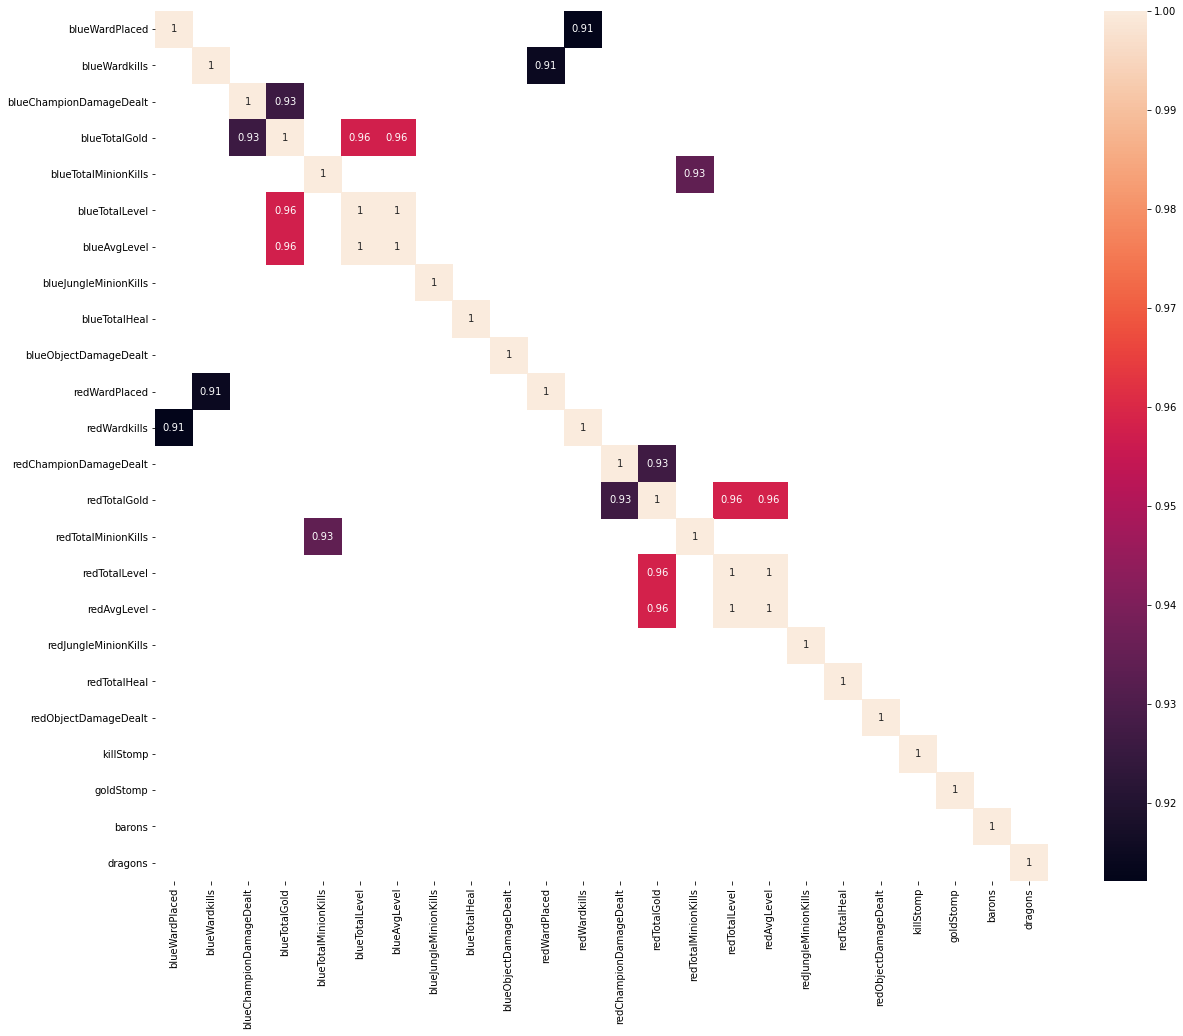

In [27]:
plt.figure(figsize=(20,16))
sns.heatmap(df[cols].corr()[(df[cols].corr()>=0.9) | (df[cols].corr()<=(-0.9))], annot = df[cols].corr().round(2))

We see from correlation matrix that some variables are strongly correlated as expected, we can drop one in each pair because it does not give us much additiona information:

RedAvgLevel-RedTotalLevel  (one is sum and the other is mean)  
BlueAvgLevel-BlueTotalLevel  
blueWardPlaced - blueWardkills (the more wards placed the more wards killed)  
redWardPlaced - redWardkills  
redTotalMinionKills - blueTotalMinionKills  
redTotalGold and blueTotalGold as they are strongly correlated with 2 variables  
redTotalMinionKills - redTotalMinionKills  

In [28]:
cols=['blueWardPlaced',
 'blueChampionDamageDealt',
 'blueTotalMinionKills',
 'blueTotalLevel',
 'blueJungleMinionKills',
 'blueTotalHeal',
 'blueObjectDamageDealt',
 'redWardPlaced',
 'redChampionDamageDealt',
 'redTotalLevel',
 'redJungleMinionKills',
 'redTotalHeal',
 'redObjectDamageDealt',
 'killStomp',
 'goldStomp',
 'barons',
 'dragons']

In the end we have 16 variables.

In [29]:
df[cols].describe()

,blueWardPlaced,blueChampionDamageDealt,blueTotalMinionKills,blueTotalLevel,blueJungleMinionKills,blueTotalHeal,blueObjectDamageDealt,redWardPlaced,redChampionDamageDealt,redTotalLevel,redJungleMinionKills,redTotalHeal,redObjectDamageDealt,killStomp,goldStomp,barons,dragons
count,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000,199925.00000
mean,0.23233,0.18219,0.33033,0.43908,0.30824,0.09322,0.22139,0.21597,0.19278,0.44769,0.25764,0.11983,0.18714,0.29514,0.10408,0.12548,0.31951
std,0.13203,0.09815,0.11726,0.10894,0.16419,0.05820,0.15856,0.12337,0.10424,0.10313,0.13706,0.07462,0.13654,0.19386,0.06677,0.14479,0.17408
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.14348,0.10907,0.25297,0.36765,0.20647,0.05095,0.08138,0.13306,0.11502,0.37931,0.17213,0.06576,0.06462,0.14706,0.05561,0.00000,0.22222
50%,0.23043,0.16904,0.34016,0.44853,0.31343,0.08150,0.19752,0.21371,0.17897,0.45517,0.26230,0.10511,0.16478,0.27273,0.09497,0.00000,0.33333
75%,0.31739,0.23826,0.41149,0.51471,0.42040,0.12256,0.33876,0.29435,0.25246,0.51724,0.35246,0.15762,0.29072,0.41176,0.13943,0.20000,0.44444
max,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


# Model

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV
y=df['gameDuration']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df[cols], y, test_size=0.3, random_state=101)

### Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
# here we use grid search despite having no hyperparameters to search through 
# we do it because it is easy way to perform kfold cross validation
parameters = {}

linreg = LinearRegression()
gs1 = GridSearchCV(linreg, parameters, cv = 10, return_train_score = True, scoring='neg_mean_absolute_error')

gs1.fit(X_train, y_train)


res1 = pd.DataFrame(gs1.cv_results_)[['params','mean_train_score','mean_test_score', 'rank_test_score']]
res1['dif'] = res1['mean_train_score'] - res1['mean_test_score']

res1 = res1.sort_values('rank_test_score')
res1.columns = ['params', 'mean_train_score', 'mean_val_score', 'rank', 'dif']
res1['mean_train_score'] = -1*res1['mean_train_score']/np.mean(y_train)
res1['mean_val_score'] = -1*res1['mean_val_score']/np.mean(y_train)
res1.head(10)

,params,mean_train_score,mean_val_score,rank,dif
0,{},0.04374,0.04375,1,0.00890


## Ridge

In [34]:
from sklearn.linear_model import Ridge

In [35]:
parameters = {'alpha':[0.001, 0.01,0.1,1],
             'tol':[0.001, 0.01,0.1,1]}

rid = Ridge()
gs2 = GridSearchCV(rid, parameters, cv = 10, return_train_score = True, scoring='neg_mean_absolute_error')

gs2.fit(X_train, y_train)


res2 = pd.DataFrame(gs2.cv_results_)[['params','mean_train_score','mean_test_score', 'rank_test_score']]
res2['dif'] = res2['mean_train_score'] - res2['mean_test_score']

res2 = res2.sort_values('rank_test_score')
res2.columns = ['params', 'mean_train_score', 'mean_val_score', 'rank', 'dif']
res2['mean_train_score'] = -1*res2['mean_train_score']/np.mean(y_train)
res2['mean_val_score'] = -1*res2['mean_val_score']/np.mean(y_train)
res2.head(10)

,params,mean_train_score,mean_val_score,rank,dif
12,"{'alpha': 1, 'tol': 0.001}",0.04372,0.04372,1,0.00882
13,"{'alpha': 1, 'tol': 0.01}",0.04372,0.04372,1,0.00882
14,"{'alpha': 1, 'tol': 0.1}",0.04372,0.04372,1,0.00882
15,"{'alpha': 1, 'tol': 1}",0.04372,0.04372,1,0.00882
8,"{'alpha': 0.1, 'tol': 0.001}",0.04374,0.04374,5,0.00890
9,"{'alpha': 0.1, 'tol': 0.01}",0.04374,0.04374,5,0.00890
10,"{'alpha': 0.1, 'tol': 0.1}",0.04374,0.04374,5,0.00890
11,"{'alpha': 0.1, 'tol': 1}",0.04374,0.04374,5,0.00890
4,"{'alpha': 0.01, 'tol': 0.001}",0.04374,0.04375,9,0.00890
5,"{'alpha': 0.01, 'tol': 0.01}",0.04374,0.04375,9,0.00890


# Neural Network

In [36]:
import tensorflow.keras as keras
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [37]:
X_train.shape

(139947, 17)

In [38]:
def build_model(architecture, depth):
    if architecture == 1:
        d1 = 64; d2 = 64; d3 = 32; d4 = 32
    elif architecture == 2:
        d1 = 64; d2 = 32; d3 = 32; d4 = 16
    elif architecture == 3:
        d1 = 32;d2 = 32; d3 = 16; d4 = 16

    model = keras.models.Sequential()
    
    model.add(keras.layers.Dense(d1, input_dim=17, activation='relu'))
    model.add(keras.layers.Dense(d2, activation='relu'))
    if depth >=3:
        model.add(keras.layers.Dense(d3, activation='relu'))
    if depth >= 4:
        model.add(keras.layers.Dense(d4, activation='relu'))
    
    model.add(keras.layers.Dense(1, activation='linear'))
    
    model.compile(optimizer='adam',
                  loss='mean_absolute_percentage_error')
    return model

In [39]:
param_grid = dict(architecture=[1,2,3],
                  depth = [2,3,4])


nn = KerasRegressor(build_fn=build_model, epochs=100, batch_size=512)

gs3 = GridSearchCV(estimator=nn, param_grid=param_grid, cv = 10, verbose=10,return_train_score=True)

gs3.fit(X_train, y_train)

res3 = pd.DataFrame(gs3.cv_results_)[['params','mean_train_score','mean_test_score', 'rank_test_score']]

res3['mean_train_score'] = res3['mean_train_score']/(-100)
res3['mean_test_score'] = res3['mean_test_score']/(-100)
res3['dif'] = res3['mean_train_score'] - res3['mean_test_score']

res3 = res3.sort_values('rank_test_score')
res3.to_csv('res6.csv')
res3.head(10)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] architecture=1, depth=2 .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/100
246/246 [==============================] - 0s 663us/step - loss: 81.6110
Epoch 2/100
246/246 [==============================] - 0s 646us/step - loss: 8.8517
Epoch 3/100
246/246 [==============================] - 0s 624us/step - loss: 6.2227
Epoch 4/100
246/246 [==============================] - 0s 658us/step - loss: 5.5274
Epoch 5/100
246/246 [==============================] - 0s 628us/step - loss: 5.2005
Epoch 6/100
246/246 [==============================] - 0s 681us/step - loss: 4.9489
Epoch 7/100
246/246 [==============================] - 0s 659us/step - loss: 4.7910
Epoch 8/100
246/246 [==============================] - 0s 639us/step - loss: 4.7044
Epoch 9/100
246/246 [==============================] - 0s 672us/step - loss: 4.6531
Epoch 10/100
246/246 [==============================] - 0s 685us/step - loss: 4.6307
Epoch 11/100
246/246 [==============================] - 0s 675us/step - loss: 4.6140
Epoch 12/100
246/246 [==============================] - 0s 667us/step - l

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.2s remaining:    0.0s


Epoch 1/100
246/246 [==============================] - 0s 610us/step - loss: 86.7156
Epoch 2/100
246/246 [==============================] - 0s 596us/step - loss: 12.1539
Epoch 3/100
246/246 [==============================] - 0s 602us/step - loss: 6.7546
Epoch 4/100
246/246 [==============================] - 0s 605us/step - loss: 5.7367
Epoch 5/100
246/246 [==============================] - 0s 617us/step - loss: 5.3157
Epoch 6/100
246/246 [==============================] - 0s 620us/step - loss: 5.0369
Epoch 7/100
246/246 [==============================] - 0s 627us/step - loss: 4.8282
Epoch 8/100
246/246 [==============================] - 0s 635us/step - loss: 4.7163
Epoch 9/100
246/246 [==============================] - 0s 610us/step - loss: 4.6535
Epoch 10/100
246/246 [==============================] - 0s 633us/step - loss: 4.6220
Epoch 11/100
246/246 [==============================] - 0s 604us/step - loss: 4.6030
Epoch 12/100
246/246 [==============================] - 0s 611us/step - 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   56.3s remaining:    0.0s


Epoch 1/100
246/246 [==============================] - 0s 615us/step - loss: 85.9744
Epoch 2/100
246/246 [==============================] - 0s 603us/step - loss: 11.3329
Epoch 3/100
246/246 [==============================] - 0s 583us/step - loss: 6.6077
Epoch 4/100
246/246 [==============================] - 0s 592us/step - loss: 5.7145
Epoch 5/100
246/246 [==============================] - 0s 571us/step - loss: 5.3214
Epoch 6/100
246/246 [==============================] - 0s 607us/step - loss: 5.0555
Epoch 7/100
246/246 [==============================] - 0s 602us/step - loss: 4.8585
Epoch 8/100
246/246 [==============================] - 0s 631us/step - loss: 4.7408
Epoch 9/100
246/246 [==============================] - 0s 602us/step - loss: 4.6707
Epoch 10/100
246/246 [==============================] - 0s 604us/step - loss: 4.6306
Epoch 11/100
246/246 [==============================] - 0s 584us/step - loss: 4.6106
Epoch 12/100
246/246 [==============================] - 0s 605us/step - 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min remaining:    0.0s


Epoch 1/100
246/246 [==============================] - 0s 631us/step - loss: 85.3126
Epoch 2/100
246/246 [==============================] - 0s 612us/step - loss: 11.2461
Epoch 3/100
246/246 [==============================] - 0s 596us/step - loss: 6.5868
Epoch 4/100
246/246 [==============================] - 0s 600us/step - loss: 5.6875
Epoch 5/100
246/246 [==============================] - 0s 586us/step - loss: 5.2746
Epoch 6/100
246/246 [==============================] - 0s 608us/step - loss: 5.0064
Epoch 7/100
246/246 [==============================] - 0s 606us/step - loss: 4.8095
Epoch 8/100
246/246 [==============================] - 0s 587us/step - loss: 4.7012
Epoch 9/100
246/246 [==============================] - 0s 614us/step - loss: 4.6361
Epoch 10/100
246/246 [==============================] - 0s 586us/step - loss: 4.5974
Epoch 11/100
246/246 [==============================] - 0s 594us/step - loss: 4.5687
Epoch 12/100
246/246 [==============================] - 0s 616us/step - 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.8min remaining:    0.0s


Epoch 1/100
246/246 [==============================] - 0s 620us/step - loss: 89.2761
Epoch 2/100
246/246 [==============================] - 0s 604us/step - loss: 15.1127
Epoch 3/100
246/246 [==============================] - 0s 606us/step - loss: 6.9144
Epoch 4/100
246/246 [==============================] - 0s 589us/step - loss: 5.8921
Epoch 5/100
246/246 [==============================] - 0s 605us/step - loss: 5.4823
Epoch 6/100
246/246 [==============================] - 0s 608us/step - loss: 5.2354
Epoch 7/100
246/246 [==============================] - 0s 609us/step - loss: 5.0303
Epoch 8/100
246/246 [==============================] - 0s 626us/step - loss: 4.8624
Epoch 9/100
246/246 [==============================] - 0s 607us/step - loss: 4.7503
Epoch 10/100
246/246 [==============================] - 0s 599us/step - loss: 4.6733
Epoch 11/100
246/246 [==============================] - 0s 606us/step - loss: 4.6245
Epoch 12/100
246/246 [==============================] - 0s 599us/step - 

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.3min remaining:    0.0s


Epoch 1/100
246/246 [==============================] - 0s 596us/step - loss: 86.4546
Epoch 2/100
246/246 [==============================] - 0s 591us/step - loss: 11.3546
Epoch 3/100
246/246 [==============================] - 0s 581us/step - loss: 6.6326
Epoch 4/100
246/246 [==============================] - 0s 596us/step - loss: 5.7815
Epoch 5/100
246/246 [==============================] - 0s 631us/step - loss: 5.4235
Epoch 6/100
246/246 [==============================] - 0s 645us/step - loss: 5.1983
Epoch 7/100
246/246 [==============================] - 0s 616us/step - loss: 5.0006
Epoch 8/100
246/246 [==============================] - 0s 601us/step - loss: 4.8512
Epoch 9/100
246/246 [==============================] - 0s 586us/step - loss: 4.7521
Epoch 10/100
246/246 [==============================] - 0s 579us/step - loss: 4.6869
Epoch 11/100
246/246 [==============================] - 0s 593us/step - loss: 4.6460
Epoch 12/100
246/246 [==============================] - 0s 589us/step - 

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.7min remaining:    0.0s


Epoch 1/100
246/246 [==============================] - 0s 632us/step - loss: 85.4701
Epoch 2/100
246/246 [==============================] - 0s 617us/step - loss: 10.4219
Epoch 3/100
246/246 [==============================] - 0s 621us/step - loss: 6.4287
Epoch 4/100
246/246 [==============================] - 0s 604us/step - loss: 5.6370
Epoch 5/100
246/246 [==============================] - 0s 616us/step - loss: 5.3115
Epoch 6/100
246/246 [==============================] - 0s 635us/step - loss: 5.0710
Epoch 7/100
246/246 [==============================] - 0s 637us/step - loss: 4.8723
Epoch 8/100
246/246 [==============================] - 0s 643us/step - loss: 4.7445
Epoch 9/100
246/246 [==============================] - 0s 654us/step - loss: 4.6636
Epoch 10/100
246/246 [==============================] - 0s 628us/step - loss: 4.6195
Epoch 11/100
246/246 [==============================] - 0s 625us/step - loss: 4.5963
Epoch 12/100
246/246 [==============================] - 0s 633us/step - 

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  3.2min remaining:    0.0s


Epoch 1/100
247/247 [==============================] - 0s 722us/step - loss: 84.6627
Epoch 2/100
247/247 [==============================] - 0s 704us/step - loss: 10.6921
Epoch 3/100
247/247 [==============================] - 0s 683us/step - loss: 6.8739
Epoch 4/100
247/247 [==============================] - 0s 721us/step - loss: 5.8348
Epoch 5/100
247/247 [==============================] - 0s 711us/step - loss: 5.3806
Epoch 6/100
247/247 [==============================] - 0s 729us/step - loss: 5.1094
Epoch 7/100
247/247 [==============================] - 0s 752us/step - loss: 4.8919
Epoch 8/100
247/247 [==============================] - 0s 716us/step - loss: 4.7686
Epoch 9/100
247/247 [==============================] - 0s 730us/step - loss: 4.7104
Epoch 10/100
247/247 [==============================] - 0s 710us/step - loss: 4.6675
Epoch 11/100
247/247 [==============================] - 0s 706us/step - loss: 4.6453
Epoch 12/100
247/247 [==============================] - 0s 727us/step - 

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  3.7min remaining:    0.0s


Epoch 1/100
247/247 [==============================] - 0s 712us/step - loss: 84.4187
Epoch 2/100
247/247 [==============================] - 0s 701us/step - loss: 10.3438
Epoch 3/100
247/247 [==============================] - 0s 689us/step - loss: 6.5962
Epoch 4/100
247/247 [==============================] - 0s 703us/step - loss: 5.7423
Epoch 5/100
247/247 [==============================] - 0s 704us/step - loss: 5.3946
Epoch 6/100
247/247 [==============================] - 0s 709us/step - loss: 5.1680
Epoch 7/100
247/247 [==============================] - 0s 702us/step - loss: 4.9864
Epoch 8/100
247/247 [==============================] - 0s 754us/step - loss: 4.8472
Epoch 9/100
247/247 [==============================] - 0s 693us/step - loss: 4.7556
Epoch 10/100
247/247 [==============================] - 0s 714us/step - loss: 4.6960
Epoch 11/100
247/247 [==============================] - 0s 747us/step - loss: 4.6536
Epoch 12/100
247/247 [==============================] - 0s 710us/step - 

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  4.1min remaining:    0.0s


Epoch 1/100
247/247 [==============================] - 0s 688us/step - loss: 82.6592
Epoch 2/100
247/247 [==============================] - 0s 716us/step - loss: 9.4198
Epoch 3/100
247/247 [==============================] - 0s 695us/step - loss: 6.4886
Epoch 4/100
247/247 [==============================] - 0s 695us/step - loss: 5.7018
Epoch 5/100
247/247 [==============================] - 0s 707us/step - loss: 5.3738
Epoch 6/100
247/247 [==============================] - 0s 747us/step - loss: 5.1541
Epoch 7/100
247/247 [==============================] - 0s 714us/step - loss: 4.9742
Epoch 8/100
247/247 [==============================] - 0s 725us/step - loss: 4.8350
Epoch 9/100
247/247 [==============================] - 0s 714us/step - loss: 4.7449
Epoch 10/100
247/247 [==============================] - 0s 704us/step - loss: 4.6789
Epoch 11/100
247/247 [==============================] - 0s 741us/step - loss: 4.6439
Epoch 12/100
247/247 [==============================] - 0s 717us/step - l

246/246 [==============================] - 0s 643us/step - loss: 3.4256
Epoch 91/100
246/246 [==============================] - 0s 666us/step - loss: 3.4215
Epoch 92/100
246/246 [==============================] - 0s 654us/step - loss: 3.4234
Epoch 93/100
246/246 [==============================] - 0s 642us/step - loss: 3.4210
Epoch 94/100
246/246 [==============================] - 0s 634us/step - loss: 3.4165
Epoch 95/100
246/246 [==============================] - 0s 636us/step - loss: 3.4176
Epoch 96/100
246/246 [==============================] - 0s 631us/step - loss: 3.4234
Epoch 97/100
246/246 [==============================] - 0s 655us/step - loss: 3.4100
Epoch 98/100
246/246 [==============================] - 0s 675us/step - loss: 3.4047
Epoch 99/100
246/246 [==============================] - 0s 653us/step - loss: 3.4069
Epoch 100/100
246/246 [==============================] - 0s 571us/step - loss: 3.3944
[CV]  architecture=1, depth=3, score=(train=-3.394, test=-3.390), total=  22.

246/246 [==============================] - 0s 582us/step - loss: 4.5071
Epoch 77/100
246/246 [==============================] - 0s 585us/step - loss: 4.5063
Epoch 78/100
246/246 [==============================] - 0s 581us/step - loss: 4.5083
Epoch 79/100
246/246 [==============================] - 0s 607us/step - loss: 4.5071
Epoch 80/100
246/246 [==============================] - 0s 608us/step - loss: 4.5067
Epoch 81/100
246/246 [==============================] - 0s 618us/step - loss: 4.5047
Epoch 82/100
246/246 [==============================] - 0s 631us/step - loss: 4.5048
Epoch 83/100
246/246 [==============================] - 0s 587us/step - loss: 4.5121
Epoch 84/100
246/246 [==============================] - 0s 589us/step - loss: 4.5053
Epoch 85/100
246/246 [==============================] - 0s 589us/step - loss: 4.5027
Epoch 86/100
246/246 [==============================] - 0s 590us/step - loss: 4.5058
Epoch 87/100
246/246 [==============================] - 0s 590us/step - loss: 

246/246 [==============================] - 0s 588us/step - loss: 3.4536
Epoch 63/100
246/246 [==============================] - 0s 590us/step - loss: 3.4333
Epoch 64/100
246/246 [==============================] - 0s 585us/step - loss: 3.4240
Epoch 65/100
246/246 [==============================] - 0s 578us/step - loss: 3.4259
Epoch 66/100
246/246 [==============================] - 0s 581us/step - loss: 3.4114
Epoch 67/100
246/246 [==============================] - 0s 584us/step - loss: 3.4006
Epoch 68/100
246/246 [==============================] - 0s 586us/step - loss: 3.3868
Epoch 69/100
246/246 [==============================] - 0s 587us/step - loss: 3.3831
Epoch 70/100
246/246 [==============================] - 0s 572us/step - loss: 3.3794
Epoch 71/100
246/246 [==============================] - 0s 573us/step - loss: 3.3628
Epoch 72/100
246/246 [==============================] - 0s 594us/step - loss: 3.3564
Epoch 73/100
246/246 [==============================] - 0s 573us/step - loss: 

246/246 [==============================] - 0s 599us/step - loss: 3.7856
Epoch 49/100
246/246 [==============================] - 0s 625us/step - loss: 3.7721
Epoch 50/100
246/246 [==============================] - 0s 605us/step - loss: 3.7487
Epoch 51/100
246/246 [==============================] - 0s 605us/step - loss: 3.7243
Epoch 52/100
246/246 [==============================] - 0s 607us/step - loss: 3.7068
Epoch 53/100
246/246 [==============================] - 0s 618us/step - loss: 3.6960
Epoch 54/100
246/246 [==============================] - 0s 607us/step - loss: 3.6780
Epoch 55/100
246/246 [==============================] - 0s 587us/step - loss: 3.6662
Epoch 56/100
246/246 [==============================] - 0s 585us/step - loss: 3.6582
Epoch 57/100
246/246 [==============================] - 0s 592us/step - loss: 3.6514
Epoch 58/100
246/246 [==============================] - 0s 594us/step - loss: 3.6530
Epoch 59/100
246/246 [==============================] - 0s 588us/step - loss: 

247/247 [==============================] - 0s 692us/step - loss: 4.5362
Epoch 35/100
247/247 [==============================] - 0s 713us/step - loss: 4.5503
Epoch 36/100
247/247 [==============================] - 0s 714us/step - loss: 4.5589
Epoch 37/100
247/247 [==============================] - 0s 709us/step - loss: 4.5363
Epoch 38/100
247/247 [==============================] - 0s 703us/step - loss: 4.5335
Epoch 39/100
247/247 [==============================] - 0s 696us/step - loss: 4.5510
Epoch 40/100
247/247 [==============================] - 0s 695us/step - loss: 4.5477
Epoch 41/100
247/247 [==============================] - 0s 702us/step - loss: 4.5435
Epoch 42/100
247/247 [==============================] - 0s 666us/step - loss: 4.5394
Epoch 43/100
247/247 [==============================] - 0s 669us/step - loss: 4.5417
Epoch 44/100
247/247 [==============================] - 0s 665us/step - loss: 4.5506
Epoch 45/100
247/247 [==============================] - 0s 673us/step - loss: 

246/246 [==============================] - 0s 646us/step - loss: 4.3217
Epoch 21/100
246/246 [==============================] - 0s 628us/step - loss: 4.3174
Epoch 22/100
246/246 [==============================] - 0s 631us/step - loss: 4.3133
Epoch 23/100
246/246 [==============================] - 0s 627us/step - loss: 4.3103
Epoch 24/100
246/246 [==============================] - 0s 619us/step - loss: 4.2958
Epoch 25/100
246/246 [==============================] - 0s 622us/step - loss: 4.2989
Epoch 26/100
246/246 [==============================] - 0s 633us/step - loss: 4.2935
Epoch 27/100
246/246 [==============================] - 0s 621us/step - loss: 4.2937
Epoch 28/100
246/246 [==============================] - 0s 619us/step - loss: 4.2889
Epoch 29/100
246/246 [==============================] - 0s 629us/step - loss: 4.2780
Epoch 30/100
246/246 [==============================] - 0s 631us/step - loss: 4.2829
Epoch 31/100
246/246 [==============================] - 0s 624us/step - loss: 

246/246 [==============================] - 0s 645us/step - loss: 4.5933
Epoch 7/100
246/246 [==============================] - 0s 679us/step - loss: 4.5875
Epoch 8/100
246/246 [==============================] - 0s 661us/step - loss: 4.5632
Epoch 9/100
246/246 [==============================] - 0s 632us/step - loss: 4.5315
Epoch 10/100
246/246 [==============================] - 0s 638us/step - loss: 4.4858
Epoch 11/100
246/246 [==============================] - 0s 642us/step - loss: 4.4643
Epoch 12/100
246/246 [==============================] - 0s 654us/step - loss: 4.4306
Epoch 13/100
246/246 [==============================] - 0s 650us/step - loss: 4.4082
Epoch 14/100
246/246 [==============================] - 0s 640us/step - loss: 4.3973
Epoch 15/100
246/246 [==============================] - 0s 638us/step - loss: 4.3849
Epoch 16/100
246/246 [==============================] - 0s 621us/step - loss: 4.3845
Epoch 17/100
246/246 [==============================] - 0s 620us/step - loss: 4.3

246/246 [==============================] - 0s 623us/step - loss: 3.2797
Epoch 95/100
246/246 [==============================] - 0s 624us/step - loss: 3.2850
Epoch 96/100
246/246 [==============================] - 0s 631us/step - loss: 3.2841
Epoch 97/100
246/246 [==============================] - 0s 635us/step - loss: 3.2706
Epoch 98/100
246/246 [==============================] - 0s 640us/step - loss: 3.2754
Epoch 99/100
246/246 [==============================] - 0s 618us/step - loss: 3.2784
Epoch 100/100
246/246 [==============================] - 0s 591us/step - loss: 3.2489
[CV]  architecture=1, depth=4, score=(train=-3.249, test=-3.249), total=  21.9s
[CV] architecture=1, depth=4 .........................................
Epoch 1/100
246/246 [==============================] - 0s 652us/step - loss: 42.8218
Epoch 2/100
246/246 [==============================] - 0s 622us/step - loss: 5.5161
Epoch 3/100
246/246 [==============================] - 0s 657us/step - loss: 4.7157
Epoch 4/100
2

246/246 [==============================] - 0s 629us/step - loss: 4.1672
Epoch 81/100
246/246 [==============================] - 0s 632us/step - loss: 4.1687
Epoch 82/100
246/246 [==============================] - 0s 639us/step - loss: 4.1770
Epoch 83/100
246/246 [==============================] - 0s 638us/step - loss: 4.1732
Epoch 84/100
246/246 [==============================] - 0s 628us/step - loss: 4.1649
Epoch 85/100
246/246 [==============================] - 0s 640us/step - loss: 4.1693
Epoch 86/100
246/246 [==============================] - 0s 636us/step - loss: 4.1690
Epoch 87/100
246/246 [==============================] - 0s 635us/step - loss: 4.1664
Epoch 88/100
246/246 [==============================] - 0s 646us/step - loss: 4.1676
Epoch 89/100
246/246 [==============================] - 0s 644us/step - loss: 4.1578
Epoch 90/100
246/246 [==============================] - 0s 635us/step - loss: 4.1647
Epoch 91/100
246/246 [==============================] - 0s 648us/step - loss: 

247/247 [==============================] - 0s 748us/step - loss: 3.4319
Epoch 67/100
247/247 [==============================] - 0s 746us/step - loss: 3.4165
Epoch 68/100
247/247 [==============================] - 0s 737us/step - loss: 3.4549
Epoch 69/100
247/247 [==============================] - 0s 748us/step - loss: 3.4031
Epoch 70/100
247/247 [==============================] - 0s 752us/step - loss: 3.3872
Epoch 71/100
247/247 [==============================] - 0s 745us/step - loss: 3.3931
Epoch 72/100
247/247 [==============================] - 0s 760us/step - loss: 3.3731
Epoch 73/100
247/247 [==============================] - 0s 751us/step - loss: 3.3751
Epoch 74/100
247/247 [==============================] - 0s 745us/step - loss: 3.3713
Epoch 75/100
247/247 [==============================] - 0s 759us/step - loss: 3.4096
Epoch 76/100
247/247 [==============================] - 0s 774us/step - loss: 3.3597
Epoch 77/100
247/247 [==============================] - 0s 742us/step - loss: 

247/247 [==============================] - 0s 750us/step - loss: 4.3944
Epoch 53/100
247/247 [==============================] - 0s 745us/step - loss: 4.3577
Epoch 54/100
247/247 [==============================] - 0s 756us/step - loss: 4.2990
Epoch 55/100
247/247 [==============================] - 0s 744us/step - loss: 4.1992
Epoch 56/100
247/247 [==============================] - 0s 753us/step - loss: 4.1150
Epoch 57/100
247/247 [==============================] - 0s 755us/step - loss: 4.0377
Epoch 58/100
247/247 [==============================] - 0s 768us/step - loss: 3.9459
Epoch 59/100
247/247 [==============================] - 0s 756us/step - loss: 3.8549
Epoch 60/100
247/247 [==============================] - 0s 733us/step - loss: 3.7742
Epoch 61/100
247/247 [==============================] - 0s 727us/step - loss: 3.6972
Epoch 62/100
247/247 [==============================] - 0s 738us/step - loss: 3.6580
Epoch 63/100
247/247 [==============================] - 0s 738us/step - loss: 

246/246 [==============================] - 0s 557us/step - loss: 4.4952
Epoch 39/100
246/246 [==============================] - 0s 570us/step - loss: 4.4962
Epoch 40/100
246/246 [==============================] - 0s 578us/step - loss: 4.4922
Epoch 41/100
246/246 [==============================] - 0s 569us/step - loss: 4.4918
Epoch 42/100
246/246 [==============================] - 0s 570us/step - loss: 4.4872
Epoch 43/100
246/246 [==============================] - 0s 578us/step - loss: 4.4858
Epoch 44/100
246/246 [==============================] - 0s 566us/step - loss: 4.4859
Epoch 45/100
246/246 [==============================] - 0s 561us/step - loss: 4.4838
Epoch 46/100
246/246 [==============================] - 0s 571us/step - loss: 4.4824
Epoch 47/100
246/246 [==============================] - 0s 573us/step - loss: 4.4819
Epoch 48/100
246/246 [==============================] - 0s 567us/step - loss: 4.4812
Epoch 49/100
246/246 [==============================] - 0s 566us/step - loss: 

246/246 [==============================] - 0s 536us/step - loss: 4.4971
Epoch 25/100
246/246 [==============================] - 0s 534us/step - loss: 4.4956
Epoch 26/100
246/246 [==============================] - 0s 531us/step - loss: 4.4912
Epoch 27/100
246/246 [==============================] - 0s 535us/step - loss: 4.4864
Epoch 28/100
246/246 [==============================] - 0s 526us/step - loss: 4.4841
Epoch 29/100
246/246 [==============================] - 0s 529us/step - loss: 4.4788
Epoch 30/100
246/246 [==============================] - 0s 537us/step - loss: 4.4730
Epoch 31/100
246/246 [==============================] - 0s 542us/step - loss: 4.4691
Epoch 32/100
246/246 [==============================] - 0s 531us/step - loss: 4.4645
Epoch 33/100
246/246 [==============================] - 0s 536us/step - loss: 4.4591
Epoch 34/100
246/246 [==============================] - 0s 534us/step - loss: 4.4555
Epoch 35/100
246/246 [==============================] - 0s 534us/step - loss: 

246/246 [==============================] - 0s 551us/step - loss: 4.6887
Epoch 11/100
246/246 [==============================] - 0s 563us/step - loss: 4.6275
Epoch 12/100
246/246 [==============================] - 0s 563us/step - loss: 4.5907
Epoch 13/100
246/246 [==============================] - 0s 565us/step - loss: 4.5668
Epoch 14/100
246/246 [==============================] - 0s 549us/step - loss: 4.5509
Epoch 15/100
246/246 [==============================] - 0s 564us/step - loss: 4.5345
Epoch 16/100
246/246 [==============================] - 0s 551us/step - loss: 4.5243
Epoch 17/100
246/246 [==============================] - 0s 556us/step - loss: 4.5121
Epoch 18/100
246/246 [==============================] - 0s 549us/step - loss: 4.5055
Epoch 19/100
246/246 [==============================] - 0s 557us/step - loss: 4.4978
Epoch 20/100
246/246 [==============================] - 0s 554us/step - loss: 4.4890
Epoch 21/100
246/246 [==============================] - 0s 556us/step - loss: 

246/246 [==============================] - 0s 566us/step - loss: 7.1356
Epoch 4/100
246/246 [==============================] - 0s 568us/step - loss: 5.9470
Epoch 5/100
246/246 [==============================] - 0s 566us/step - loss: 5.4447
Epoch 6/100
246/246 [==============================] - 0s 567us/step - loss: 5.0464
Epoch 7/100
246/246 [==============================] - 0s 576us/step - loss: 4.7944
Epoch 8/100
246/246 [==============================] - 0s 577us/step - loss: 4.6827
Epoch 9/100
246/246 [==============================] - 0s 573us/step - loss: 4.6194
Epoch 10/100
246/246 [==============================] - 0s 573us/step - loss: 4.5791
Epoch 11/100
246/246 [==============================] - 0s 578us/step - loss: 4.5507
Epoch 12/100
246/246 [==============================] - 0s 579us/step - loss: 4.5292
Epoch 13/100
246/246 [==============================] - 0s 575us/step - loss: 4.5126
Epoch 14/100
246/246 [==============================] - 0s 568us/step - loss: 4.4997

247/247 [==============================] - 0s 642us/step - loss: 4.3856
Epoch 93/100
247/247 [==============================] - 0s 634us/step - loss: 4.3852
Epoch 94/100
247/247 [==============================] - 0s 639us/step - loss: 4.3818
Epoch 95/100
247/247 [==============================] - 0s 636us/step - loss: 4.3804
Epoch 96/100
247/247 [==============================] - 0s 640us/step - loss: 4.3785
Epoch 97/100
247/247 [==============================] - 0s 650us/step - loss: 4.3813
Epoch 98/100
247/247 [==============================] - 0s 643us/step - loss: 4.3788
Epoch 99/100
247/247 [==============================] - 0s 662us/step - loss: 4.3814
Epoch 100/100
247/247 [==============================] - 0s 542us/step - loss: 4.3981
[CV]  architecture=2, depth=2, score=(train=-4.398, test=-4.404), total=  22.6s
[CV] architecture=2, depth=2 .........................................
Epoch 1/100
247/247 [==============================] - 0s 667us/step - loss: 90.9837
Epoch 2/100

247/247 [==============================] - 0s 644us/step - loss: 4.2550
Epoch 79/100
247/247 [==============================] - 0s 633us/step - loss: 4.2510
Epoch 80/100
247/247 [==============================] - 0s 638us/step - loss: 4.2495
Epoch 81/100
247/247 [==============================] - 0s 647us/step - loss: 4.2445
Epoch 82/100
247/247 [==============================] - 0s 648us/step - loss: 4.2468
Epoch 83/100
247/247 [==============================] - 0s 689us/step - loss: 4.2457
Epoch 84/100
247/247 [==============================] - 0s 683us/step - loss: 4.2470
Epoch 85/100
247/247 [==============================] - 0s 666us/step - loss: 4.2406
Epoch 86/100
247/247 [==============================] - 0s 648us/step - loss: 4.2412
Epoch 87/100
247/247 [==============================] - 0s 661us/step - loss: 4.2389
Epoch 88/100
247/247 [==============================] - 0s 656us/step - loss: 4.2372
Epoch 89/100
247/247 [==============================] - 0s 655us/step - loss: 

246/246 [==============================] - 0s 600us/step - loss: 4.5179
Epoch 65/100
246/246 [==============================] - 0s 643us/step - loss: 4.5137
Epoch 66/100
246/246 [==============================] - 0s 585us/step - loss: 4.5139
Epoch 67/100
246/246 [==============================] - 0s 581us/step - loss: 4.5151
Epoch 68/100
246/246 [==============================] - 0s 592us/step - loss: 4.5142
Epoch 69/100
246/246 [==============================] - 0s 594us/step - loss: 4.5170
Epoch 70/100
246/246 [==============================] - 0s 566us/step - loss: 4.5146
Epoch 71/100
246/246 [==============================] - 0s 584us/step - loss: 4.5188
Epoch 72/100
246/246 [==============================] - 0s 581us/step - loss: 4.5144
Epoch 73/100
246/246 [==============================] - 0s 585us/step - loss: 4.5178
Epoch 74/100
246/246 [==============================] - 0s 583us/step - loss: 4.5115
Epoch 75/100
246/246 [==============================] - 0s 577us/step - loss: 

246/246 [==============================] - 0s 601us/step - loss: 4.4504
Epoch 51/100
246/246 [==============================] - 0s 593us/step - loss: 4.4549
Epoch 52/100
246/246 [==============================] - 0s 598us/step - loss: 4.4524
Epoch 53/100
246/246 [==============================] - 0s 595us/step - loss: 4.4506
Epoch 54/100
246/246 [==============================] - 0s 623us/step - loss: 4.4500
Epoch 55/100
246/246 [==============================] - 0s 619us/step - loss: 4.4492
Epoch 56/100
246/246 [==============================] - 0s 620us/step - loss: 4.4514
Epoch 57/100
246/246 [==============================] - 0s 622us/step - loss: 4.4486
Epoch 58/100
246/246 [==============================] - 0s 617us/step - loss: 4.4493
Epoch 59/100
246/246 [==============================] - 0s 613us/step - loss: 4.4508
Epoch 60/100
246/246 [==============================] - 0s 629us/step - loss: 4.4467
Epoch 61/100
246/246 [==============================] - 0s 622us/step - loss: 

246/246 [==============================] - 0s 566us/step - loss: 4.3952
Epoch 37/100
246/246 [==============================] - 0s 574us/step - loss: 4.3908
Epoch 38/100
246/246 [==============================] - 0s 582us/step - loss: 4.3912
Epoch 39/100
246/246 [==============================] - 0s 575us/step - loss: 4.3949
Epoch 40/100
246/246 [==============================] - 0s 566us/step - loss: 4.3887
Epoch 41/100
246/246 [==============================] - 0s 583us/step - loss: 4.3866
Epoch 42/100
246/246 [==============================] - 0s 579us/step - loss: 4.3910
Epoch 43/100
246/246 [==============================] - 0s 569us/step - loss: 4.3916
Epoch 44/100
246/246 [==============================] - 0s 569us/step - loss: 4.3843
Epoch 45/100
246/246 [==============================] - 0s 570us/step - loss: 4.3849
Epoch 46/100
246/246 [==============================] - 0s 566us/step - loss: 4.3822
Epoch 47/100
246/246 [==============================] - 0s 579us/step - loss: 

247/247 [==============================] - 0s 715us/step - loss: 4.5203
Epoch 23/100
247/247 [==============================] - 0s 723us/step - loss: 4.5140
Epoch 24/100
247/247 [==============================] - 0s 717us/step - loss: 4.5125
Epoch 25/100
247/247 [==============================] - 0s 708us/step - loss: 4.5168
Epoch 26/100
247/247 [==============================] - 0s 699us/step - loss: 4.5104
Epoch 27/100
247/247 [==============================] - 0s 696us/step - loss: 4.5048
Epoch 28/100
247/247 [==============================] - 0s 701us/step - loss: 4.5012
Epoch 29/100
247/247 [==============================] - 0s 710us/step - loss: 4.5059
Epoch 30/100
247/247 [==============================] - 0s 693us/step - loss: 4.5027
Epoch 31/100
247/247 [==============================] - 0s 701us/step - loss: 4.5000
Epoch 32/100
247/247 [==============================] - 0s 706us/step - loss: 4.5014
Epoch 33/100
247/247 [==============================] - 0s 705us/step - loss: 

247/247 [==============================] - 0s 704us/step - loss: 4.5777
Epoch 9/100
247/247 [==============================] - 0s 696us/step - loss: 4.5665
Epoch 10/100
247/247 [==============================] - 0s 714us/step - loss: 4.5611
Epoch 11/100
247/247 [==============================] - 0s 707us/step - loss: 4.5582
Epoch 12/100
247/247 [==============================] - 0s 715us/step - loss: 4.5451
Epoch 13/100
247/247 [==============================] - 0s 690us/step - loss: 4.5327
Epoch 14/100
247/247 [==============================] - 0s 681us/step - loss: 4.5226
Epoch 15/100
247/247 [==============================] - 0s 689us/step - loss: 4.5192
Epoch 16/100
247/247 [==============================] - 0s 708us/step - loss: 4.5171
Epoch 17/100
247/247 [==============================] - 0s 706us/step - loss: 4.4875
Epoch 18/100
247/247 [==============================] - 0s 698us/step - loss: 4.4810
Epoch 19/100
247/247 [==============================] - 0s 698us/step - loss: 4

246/246 [==============================] - 0s 656us/step - loss: 58.2981
Epoch 2/100
246/246 [==============================] - 0s 623us/step - loss: 6.2549
Epoch 3/100
246/246 [==============================] - 0s 630us/step - loss: 5.0620
Epoch 4/100
246/246 [==============================] - 0s 618us/step - loss: 4.7046
Epoch 5/100
246/246 [==============================] - 0s 620us/step - loss: 4.6130
Epoch 6/100
246/246 [==============================] - 0s 629us/step - loss: 4.5853
Epoch 7/100
246/246 [==============================] - 0s 645us/step - loss: 4.5699
Epoch 8/100
246/246 [==============================] - 0s 639us/step - loss: 4.5548
Epoch 9/100
246/246 [==============================] - 0s 619us/step - loss: 4.5443
Epoch 10/100
246/246 [==============================] - 0s 666us/step - loss: 4.5333
Epoch 11/100
246/246 [==============================] - 0s 656us/step - loss: 4.5328
Epoch 12/100
246/246 [==============================] - 0s 672us/step - loss: 4.5252


246/246 [==============================] - 0s 647us/step - loss: 4.1354
Epoch 91/100
246/246 [==============================] - 0s 646us/step - loss: 4.1380
Epoch 92/100
246/246 [==============================] - 0s 653us/step - loss: 4.1395
Epoch 93/100
246/246 [==============================] - 0s 659us/step - loss: 4.1337
Epoch 94/100
246/246 [==============================] - 0s 652us/step - loss: 4.1335
Epoch 95/100
246/246 [==============================] - 0s 649us/step - loss: 4.1338
Epoch 96/100
246/246 [==============================] - 0s 647us/step - loss: 4.1327
Epoch 97/100
246/246 [==============================] - 0s 648us/step - loss: 4.1293
Epoch 98/100
246/246 [==============================] - 0s 654us/step - loss: 4.1352
Epoch 99/100
246/246 [==============================] - 0s 658us/step - loss: 4.1362
Epoch 100/100
246/246 [==============================] - 0s 558us/step - loss: 4.1222
[CV]  architecture=2, depth=4, score=(train=-4.122, test=-4.104), total=  22.

246/246 [==============================] - 0s 637us/step - loss: 3.3501
Epoch 77/100
246/246 [==============================] - 0s 637us/step - loss: 3.3461
Epoch 78/100
246/246 [==============================] - 0s 637us/step - loss: 3.3440
Epoch 79/100
246/246 [==============================] - 0s 640us/step - loss: 3.3422
Epoch 80/100
246/246 [==============================] - 0s 638us/step - loss: 3.3423
Epoch 81/100
246/246 [==============================] - 0s 655us/step - loss: 3.3426
Epoch 82/100
246/246 [==============================] - 0s 644us/step - loss: 3.3321
Epoch 83/100
246/246 [==============================] - 0s 642us/step - loss: 3.3347
Epoch 84/100
246/246 [==============================] - 0s 642us/step - loss: 3.3359
Epoch 85/100
246/246 [==============================] - 0s 641us/step - loss: 3.3334
Epoch 86/100
246/246 [==============================] - 0s 644us/step - loss: 3.3328
Epoch 87/100
246/246 [==============================] - 0s 654us/step - loss: 

246/246 [==============================] - 0s 616us/step - loss: 3.3414
Epoch 63/100
246/246 [==============================] - 0s 615us/step - loss: 3.3358
Epoch 64/100
246/246 [==============================] - 0s 627us/step - loss: 3.3337
Epoch 65/100
246/246 [==============================] - 0s 666us/step - loss: 3.3326
Epoch 66/100
246/246 [==============================] - 0s 652us/step - loss: 3.3240
Epoch 67/100
246/246 [==============================] - 0s 648us/step - loss: 3.3260
Epoch 68/100
246/246 [==============================] - 0s 618us/step - loss: 3.3208
Epoch 69/100
246/246 [==============================] - 0s 616us/step - loss: 3.3184
Epoch 70/100
246/246 [==============================] - 0s 610us/step - loss: 3.3122
Epoch 71/100
246/246 [==============================] - 0s 627us/step - loss: 3.3089
Epoch 72/100
246/246 [==============================] - 0s 628us/step - loss: 3.3078
Epoch 73/100
246/246 [==============================] - 0s 628us/step - loss: 

247/247 [==============================] - 0s 743us/step - loss: 4.3938
Epoch 49/100
247/247 [==============================] - 0s 738us/step - loss: 4.3924
Epoch 50/100
247/247 [==============================] - 0s 739us/step - loss: 4.3755
Epoch 51/100
247/247 [==============================] - 0s 705us/step - loss: 4.3874
Epoch 52/100
247/247 [==============================] - 0s 733us/step - loss: 4.3882
Epoch 53/100
247/247 [==============================] - 0s 733us/step - loss: 4.3863
Epoch 54/100
247/247 [==============================] - 0s 736us/step - loss: 4.3980
Epoch 55/100
247/247 [==============================] - 0s 746us/step - loss: 4.3796
Epoch 56/100
247/247 [==============================] - 0s 775us/step - loss: 4.3819
Epoch 57/100
247/247 [==============================] - 0s 750us/step - loss: 4.3954
Epoch 58/100
247/247 [==============================] - 0s 760us/step - loss: 4.3759
Epoch 59/100
247/247 [==============================] - 0s 723us/step - loss: 

247/247 [==============================] - 0s 744us/step - loss: 4.3802
Epoch 35/100
247/247 [==============================] - 0s 740us/step - loss: 4.3719
Epoch 36/100
247/247 [==============================] - 0s 739us/step - loss: 4.3805
Epoch 37/100
247/247 [==============================] - 0s 742us/step - loss: 4.3582
Epoch 38/100
247/247 [==============================] - 0s 741us/step - loss: 4.3440
Epoch 39/100
247/247 [==============================] - 0s 732us/step - loss: 4.3461
Epoch 40/100
247/247 [==============================] - 0s 732us/step - loss: 4.3290
Epoch 41/100
247/247 [==============================] - 0s 743us/step - loss: 4.3124
Epoch 42/100
247/247 [==============================] - 0s 735us/step - loss: 4.3107
Epoch 43/100
247/247 [==============================] - 0s 736us/step - loss: 4.2811
Epoch 44/100
247/247 [==============================] - 0s 740us/step - loss: 4.2138
Epoch 45/100
247/247 [==============================] - 0s 727us/step - loss: 

246/246 [==============================] - 0s 567us/step - loss: 4.5798
Epoch 21/100
246/246 [==============================] - 0s 564us/step - loss: 4.5756
Epoch 22/100
246/246 [==============================] - 0s 572us/step - loss: 4.5722
Epoch 23/100
246/246 [==============================] - 0s 569us/step - loss: 4.5688
Epoch 24/100
246/246 [==============================] - 0s 565us/step - loss: 4.5667
Epoch 25/100
246/246 [==============================] - 0s 570us/step - loss: 4.5645
Epoch 26/100
246/246 [==============================] - 0s 563us/step - loss: 4.5618
Epoch 27/100
246/246 [==============================] - 0s 573us/step - loss: 4.5594
Epoch 28/100
246/246 [==============================] - 0s 568us/step - loss: 4.5592
Epoch 29/100
246/246 [==============================] - 0s 570us/step - loss: 4.5572
Epoch 30/100
246/246 [==============================] - 0s 552us/step - loss: 4.5546
Epoch 31/100
246/246 [==============================] - 0s 567us/step - loss: 

246/246 [==============================] - 0s 574us/step - loss: 5.7810
Epoch 7/100
246/246 [==============================] - 0s 560us/step - loss: 5.4300
Epoch 8/100
246/246 [==============================] - 0s 592us/step - loss: 5.2045
Epoch 9/100
246/246 [==============================] - 0s 586us/step - loss: 5.0163
Epoch 10/100
246/246 [==============================] - 0s 578us/step - loss: 4.8605
Epoch 11/100
246/246 [==============================] - 0s 574us/step - loss: 4.7574
Epoch 12/100
246/246 [==============================] - 0s 580us/step - loss: 4.6884
Epoch 13/100
246/246 [==============================] - 0s 589us/step - loss: 4.6367
Epoch 14/100
246/246 [==============================] - 0s 575us/step - loss: 4.5992
Epoch 15/100
246/246 [==============================] - 0s 592us/step - loss: 4.5764
Epoch 16/100
246/246 [==============================] - 0s 588us/step - loss: 4.5614
Epoch 17/100
246/246 [==============================] - 0s 593us/step - loss: 4.5

246/246 [==============================] - 0s 581us/step - loss: 4.5445
Epoch 95/100
246/246 [==============================] - 0s 579us/step - loss: 4.5455
Epoch 96/100
246/246 [==============================] - 0s 582us/step - loss: 4.5428
Epoch 97/100
246/246 [==============================] - 0s 591us/step - loss: 4.5426
Epoch 98/100
246/246 [==============================] - 0s 590us/step - loss: 4.5415
Epoch 99/100
246/246 [==============================] - 0s 594us/step - loss: 4.5438
Epoch 100/100
246/246 [==============================] - 0s 583us/step - loss: 4.5379
[CV]  architecture=3, depth=2, score=(train=-4.538, test=-4.579), total=  20.6s
[CV] architecture=3, depth=2 .........................................
Epoch 1/100
246/246 [==============================] - 0s 594us/step - loss: 95.8009
Epoch 2/100
246/246 [==============================] - 0s 555us/step - loss: 42.1356
Epoch 3/100
246/246 [==============================] - 0s 554us/step - loss: 8.2524
Epoch 4/100


246/246 [==============================] - 0s 576us/step - loss: 4.5563
Epoch 81/100
246/246 [==============================] - 0s 557us/step - loss: 4.5553
Epoch 82/100
246/246 [==============================] - 0s 566us/step - loss: 4.5560
Epoch 83/100
246/246 [==============================] - 0s 550us/step - loss: 4.5561
Epoch 84/100
246/246 [==============================] - 0s 541us/step - loss: 4.5569
Epoch 85/100
246/246 [==============================] - 0s 546us/step - loss: 4.5579
Epoch 86/100
246/246 [==============================] - 0s 555us/step - loss: 4.5563
Epoch 87/100
246/246 [==============================] - 0s 563us/step - loss: 4.5551
Epoch 88/100
246/246 [==============================] - 0s 575us/step - loss: 4.5565
Epoch 89/100
246/246 [==============================] - 0s 563us/step - loss: 4.5548
Epoch 90/100
246/246 [==============================] - 0s 564us/step - loss: 4.5550
Epoch 91/100
246/246 [==============================] - 0s 562us/step - loss: 

247/247 [==============================] - 0s 632us/step - loss: 4.5556
Epoch 67/100
247/247 [==============================] - 0s 632us/step - loss: 4.5550
Epoch 68/100
247/247 [==============================] - 0s 669us/step - loss: 4.5545
Epoch 69/100
247/247 [==============================] - 0s 647us/step - loss: 4.5510
Epoch 70/100
247/247 [==============================] - 0s 631us/step - loss: 4.5505
Epoch 71/100
247/247 [==============================] - 0s 629us/step - loss: 4.5540
Epoch 72/100
247/247 [==============================] - 0s 632us/step - loss: 4.5545
Epoch 73/100
247/247 [==============================] - 0s 629us/step - loss: 4.5513
Epoch 74/100
247/247 [==============================] - 0s 657us/step - loss: 4.5515
Epoch 75/100
247/247 [==============================] - 0s 681us/step - loss: 4.5507
Epoch 76/100
247/247 [==============================] - 0s 651us/step - loss: 4.5493
Epoch 77/100
247/247 [==============================] - 0s 658us/step - loss: 

246/246 [==============================] - 0s 570us/step - loss: 4.5222
Epoch 53/100
246/246 [==============================] - 0s 568us/step - loss: 4.5234
Epoch 54/100
246/246 [==============================] - 0s 585us/step - loss: 4.5174
Epoch 55/100
246/246 [==============================] - 0s 585us/step - loss: 4.5187
Epoch 56/100
246/246 [==============================] - 0s 577us/step - loss: 4.5124
Epoch 57/100
246/246 [==============================] - 0s 566us/step - loss: 4.5122
Epoch 58/100
246/246 [==============================] - 0s 580us/step - loss: 4.5108
Epoch 59/100
246/246 [==============================] - 0s 575us/step - loss: 4.5048
Epoch 60/100
246/246 [==============================] - 0s 574us/step - loss: 4.5095
Epoch 61/100
246/246 [==============================] - 0s 577us/step - loss: 4.5088
Epoch 62/100
246/246 [==============================] - 0s 573us/step - loss: 4.5038
Epoch 63/100
246/246 [==============================] - 0s 584us/step - loss: 

246/246 [==============================] - 0s 604us/step - loss: 4.5323
Epoch 39/100
246/246 [==============================] - 0s 609us/step - loss: 4.5344
Epoch 40/100
246/246 [==============================] - 0s 601us/step - loss: 4.5320
Epoch 41/100
246/246 [==============================] - 0s 604us/step - loss: 4.5310
Epoch 42/100
246/246 [==============================] - 0s 588us/step - loss: 4.5307
Epoch 43/100
246/246 [==============================] - 0s 573us/step - loss: 4.5354
Epoch 44/100
246/246 [==============================] - 0s 579us/step - loss: 4.5298
Epoch 45/100
246/246 [==============================] - 0s 580us/step - loss: 4.5325
Epoch 46/100
246/246 [==============================] - 0s 583us/step - loss: 4.5284
Epoch 47/100
246/246 [==============================] - 0s 584us/step - loss: 4.5280
Epoch 48/100
246/246 [==============================] - 0s 568us/step - loss: 4.5284
Epoch 49/100
246/246 [==============================] - 0s 609us/step - loss: 

246/246 [==============================] - 0s 605us/step - loss: 4.4925
Epoch 25/100
246/246 [==============================] - 0s 604us/step - loss: 4.4776
Epoch 26/100
246/246 [==============================] - 0s 599us/step - loss: 4.4681
Epoch 27/100
246/246 [==============================] - 0s 586us/step - loss: 4.4620
Epoch 28/100
246/246 [==============================] - 0s 584us/step - loss: 4.4511
Epoch 29/100
246/246 [==============================] - 0s 568us/step - loss: 4.4492
Epoch 30/100
246/246 [==============================] - 0s 583us/step - loss: 4.4402
Epoch 31/100
246/246 [==============================] - 0s 570us/step - loss: 4.4345
Epoch 32/100
246/246 [==============================] - 0s 592us/step - loss: 4.4379
Epoch 33/100
246/246 [==============================] - 0s 591us/step - loss: 4.4280
Epoch 34/100
246/246 [==============================] - 0s 597us/step - loss: 4.4274
Epoch 35/100
246/246 [==============================] - 0s 593us/step - loss: 

246/246 [==============================] - 0s 607us/step - loss: 4.6112
Epoch 11/100
246/246 [==============================] - 0s 601us/step - loss: 4.5980
Epoch 12/100
246/246 [==============================] - 0s 598us/step - loss: 4.5874
Epoch 13/100
246/246 [==============================] - 0s 605us/step - loss: 4.5807
Epoch 14/100
246/246 [==============================] - 0s 595us/step - loss: 4.5757
Epoch 15/100
246/246 [==============================] - 0s 584us/step - loss: 4.5716
Epoch 16/100
246/246 [==============================] - 0s 581us/step - loss: 4.5664
Epoch 17/100
246/246 [==============================] - 0s 582us/step - loss: 4.5635
Epoch 18/100
246/246 [==============================] - 0s 576us/step - loss: 4.5650
Epoch 19/100
246/246 [==============================] - 0s 570us/step - loss: 4.5578
Epoch 20/100
246/246 [==============================] - 0s 576us/step - loss: 4.5581
Epoch 21/100
246/246 [==============================] - 0s 589us/step - loss: 

247/247 [==============================] - 0s 697us/step - loss: 6.5224
Epoch 4/100
247/247 [==============================] - 0s 701us/step - loss: 5.7229
Epoch 5/100
247/247 [==============================] - 0s 708us/step - loss: 5.3702
Epoch 6/100
247/247 [==============================] - 0s 709us/step - loss: 5.1091
Epoch 7/100
247/247 [==============================] - 0s 678us/step - loss: 4.8951
Epoch 8/100
247/247 [==============================] - 0s 691us/step - loss: 4.7646
Epoch 9/100
247/247 [==============================] - 0s 687us/step - loss: 4.6968
Epoch 10/100
247/247 [==============================] - 0s 690us/step - loss: 4.6522
Epoch 11/100
247/247 [==============================] - 0s 689us/step - loss: 4.6288
Epoch 12/100
247/247 [==============================] - 0s 696us/step - loss: 4.6129
Epoch 13/100
247/247 [==============================] - 0s 686us/step - loss: 4.6042
Epoch 14/100
247/247 [==============================] - 0s 675us/step - loss: 4.5966

247/247 [==============================] - 0s 660us/step - loss: 3.5473
Epoch 93/100
247/247 [==============================] - 0s 686us/step - loss: 3.5428
Epoch 94/100
247/247 [==============================] - 0s 670us/step - loss: 3.5413
Epoch 95/100
247/247 [==============================] - 0s 682us/step - loss: 3.5304
Epoch 96/100
247/247 [==============================] - 0s 682us/step - loss: 3.5518
Epoch 97/100
247/247 [==============================] - 0s 684us/step - loss: 3.5229
Epoch 98/100
247/247 [==============================] - 0s 706us/step - loss: 3.5258
Epoch 99/100
247/247 [==============================] - 0s 706us/step - loss: 3.5228
Epoch 100/100
247/247 [==============================] - 0s 532us/step - loss: 3.6214
[CV]  architecture=3, depth=3, score=(train=-3.621, test=-3.650), total=  23.4s
[CV] architecture=3, depth=3 .........................................
Epoch 1/100
247/247 [==============================] - 0s 725us/step - loss: 79.9899
Epoch 2/100

246/246 [==============================] - 0s 638us/step - loss: 4.5366
Epoch 79/100
246/246 [==============================] - 0s 657us/step - loss: 4.5355
Epoch 80/100
246/246 [==============================] - 0s 642us/step - loss: 4.5330
Epoch 81/100
246/246 [==============================] - 0s 642us/step - loss: 4.5341
Epoch 82/100
246/246 [==============================] - 0s 652us/step - loss: 4.5344
Epoch 83/100
246/246 [==============================] - 0s 647us/step - loss: 4.5379
Epoch 84/100
246/246 [==============================] - 0s 646us/step - loss: 4.5370
Epoch 85/100
246/246 [==============================] - 0s 641us/step - loss: 4.5337
Epoch 86/100
246/246 [==============================] - 0s 649us/step - loss: 4.5351
Epoch 87/100
246/246 [==============================] - 0s 644us/step - loss: 4.5349
Epoch 88/100
246/246 [==============================] - 0s 650us/step - loss: 4.5314
Epoch 89/100
246/246 [==============================] - 0s 646us/step - loss: 

246/246 [==============================] - 0s 636us/step - loss: 4.5175
Epoch 65/100
246/246 [==============================] - 0s 649us/step - loss: 4.5223
Epoch 66/100
246/246 [==============================] - 0s 652us/step - loss: 4.5167
Epoch 67/100
246/246 [==============================] - 0s 660us/step - loss: 4.5213
Epoch 68/100
246/246 [==============================] - 0s 645us/step - loss: 4.5184
Epoch 69/100
246/246 [==============================] - 0s 622us/step - loss: 4.5189
Epoch 70/100
246/246 [==============================] - 0s 643us/step - loss: 4.5161
Epoch 71/100
246/246 [==============================] - 0s 643us/step - loss: 4.5187
Epoch 72/100
246/246 [==============================] - 0s 637us/step - loss: 4.5062
Epoch 73/100
246/246 [==============================] - 0s 625us/step - loss: 4.4792
Epoch 74/100
246/246 [==============================] - 0s 631us/step - loss: 4.4646
Epoch 75/100
246/246 [==============================] - 0s 633us/step - loss: 

246/246 [==============================] - 0s 619us/step - loss: 4.5262
Epoch 51/100
246/246 [==============================] - 0s 620us/step - loss: 4.5258
Epoch 52/100
246/246 [==============================] - 0s 625us/step - loss: 4.5364
Epoch 53/100
246/246 [==============================] - 0s 624us/step - loss: 4.5258
Epoch 54/100
246/246 [==============================] - 0s 620us/step - loss: 4.5307
Epoch 55/100
246/246 [==============================] - 0s 624us/step - loss: 4.5333
Epoch 56/100
246/246 [==============================] - 0s 624us/step - loss: 4.5206
Epoch 57/100
246/246 [==============================] - 0s 623us/step - loss: 4.5225
Epoch 58/100
246/246 [==============================] - 0s 616us/step - loss: 4.5233
Epoch 59/100
246/246 [==============================] - 0s 629us/step - loss: 4.5245
Epoch 60/100
246/246 [==============================] - 0s 625us/step - loss: 4.5221
Epoch 61/100
246/246 [==============================] - 0s 622us/step - loss: 

246/246 [==============================] - 0s 622us/step - loss: 4.3787
Epoch 37/100
246/246 [==============================] - 0s 616us/step - loss: 4.3535
Epoch 38/100
246/246 [==============================] - 0s 618us/step - loss: 4.3164
Epoch 39/100
246/246 [==============================] - 0s 607us/step - loss: 4.2808
Epoch 40/100
246/246 [==============================] - 0s 606us/step - loss: 4.2385
Epoch 41/100
246/246 [==============================] - 0s 611us/step - loss: 4.1895
Epoch 42/100
246/246 [==============================] - 0s 608us/step - loss: 4.1363
Epoch 43/100
246/246 [==============================] - 0s 603us/step - loss: 4.0751
Epoch 44/100
246/246 [==============================] - 0s 598us/step - loss: 4.0284
Epoch 45/100
246/246 [==============================] - 0s 601us/step - loss: 3.9980
Epoch 46/100
246/246 [==============================] - 0s 596us/step - loss: 3.9815
Epoch 47/100
246/246 [==============================] - 0s 605us/step - loss: 

247/247 [==============================] - 0s 739us/step - loss: 4.5709
Epoch 23/100
247/247 [==============================] - 0s 732us/step - loss: 4.5782
Epoch 24/100
247/247 [==============================] - 0s 725us/step - loss: 4.5690
Epoch 25/100
247/247 [==============================] - 0s 727us/step - loss: 4.5837
Epoch 26/100
247/247 [==============================] - 0s 748us/step - loss: 4.5714
Epoch 27/100
247/247 [==============================] - 0s 742us/step - loss: 4.5688
Epoch 28/100
247/247 [==============================] - 0s 733us/step - loss: 4.6191
Epoch 29/100
247/247 [==============================] - 0s 730us/step - loss: 4.5688
Epoch 30/100
247/247 [==============================] - 0s 733us/step - loss: 4.5616
Epoch 31/100
247/247 [==============================] - 0s 737us/step - loss: 4.5573
Epoch 32/100
247/247 [==============================] - 0s 753us/step - loss: 4.5628
Epoch 33/100
247/247 [==============================] - 0s 720us/step - loss: 

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 41.2min finished


Epoch 1/100
274/274 [==============================] - 0s 840us/step - loss: 38.6833
Epoch 2/100
274/274 [==============================] - 0s 780us/step - loss: 5.2740
Epoch 3/100
274/274 [==============================] - 0s 812us/step - loss: 4.6538
Epoch 4/100
274/274 [==============================] - 0s 806us/step - loss: 4.5304
Epoch 5/100
274/274 [==============================] - 0s 791us/step - loss: 4.4808
Epoch 6/100
274/274 [==============================] - 0s 801us/step - loss: 4.4347
Epoch 7/100
274/274 [==============================] - 0s 821us/step - loss: 4.4088
Epoch 8/100
274/274 [==============================] - 0s 786us/step - loss: 4.3892
Epoch 9/100
274/274 [==============================] - 0s 793us/step - loss: 4.3600
Epoch 10/100
274/274 [==============================] - 0s 814us/step - loss: 4.3466
Epoch 11/100
274/274 [==============================] - 0s 814us/step - loss: 4.3391
Epoch 12/100
274/274 [==============================] - 0s 834us/step - l

,params,mean_train_score,mean_test_score,rank_test_score,dif
2,"{'architecture': 1, 'depth': 4}",0.03870,0.03861,1,0.00009
5,"{'architecture': 2, 'depth': 4}",0.04044,0.04047,2,-0.00003
1,"{'architecture': 1, 'depth': 3}",0.04081,0.04074,3,0.00007
7,"{'architecture': 3, 'depth': 3}",0.04082,0.04081,4,0.00002
3,"{'architecture': 2, 'depth': 2}",0.04092,0.04089,5,0.00003
4,"{'architecture': 2, 'depth': 3}",0.04130,0.04137,6,-0.00007
8,"{'architecture': 3, 'depth': 4}",0.04185,0.04181,7,0.00004
0,"{'architecture': 1, 'depth': 2}",0.04269,0.04270,8,-0.00002
6,"{'architecture': 3, 'depth': 2}",0.04512,0.04514,9,-0.00002


## Final Model

KNN Regressor with manhattan distance metric gives the best results despite very long compilation time. LinearSVR algorithm is slightly better than Linear Regression, both algorithms are fast, but they give worse (but not bad) predictions than KNN Regressor.

In [43]:
model = build_model(architecture=1, depth = 4)
model.fit(X_train, y_train, epochs = 100, batch_size=512)
preds = model.predict(X_test)

print("MAE: ",mean_absolute_error(y_test, preds))
print("MSE: ",mean_squared_error(y_test, preds))

print("\nRelative test MAE: ",mean_absolute_error(y_test, preds)/y.mean())

Epoch 1/100
274/274 [==============================] - 0s 891us/step - loss: 39.9455
Epoch 2/100
274/274 [==============================] - 0s 826us/step - loss: 5.4330
Epoch 3/100
274/274 [==============================] - 0s 812us/step - loss: 4.6585
Epoch 4/100
274/274 [==============================] - 0s 839us/step - loss: 4.5509
Epoch 5/100
274/274 [==============================] - 0s 829us/step - loss: 4.5144
Epoch 6/100
274/274 [==============================] - 0s 826us/step - loss: 4.4923
Epoch 7/100
274/274 [==============================] - 0s 819us/step - loss: 4.4811
Epoch 8/100
274/274 [==============================] - 0s 795us/step - loss: 4.4745
Epoch 9/100
274/274 [==============================] - 0s 842us/step - loss: 4.4653
Epoch 10/100
274/274 [==============================] - 0s 833us/step - loss: 4.4578
Epoch 11/100
274/274 [==============================] - 0s 821us/step - loss: 4.4508
Epoch 12/100
274/274 [==============================] - 0s 861us/step - l

Our final model gives even better results than during cross validation. Mean absolute error in relation to mean length of game is around 3.17%. 